# **Análisis de reducción de tasas de natalidad en Colombia: un enfoque con técnicas de aprendizaje automático**

*Especialización en analítica y ciencia de datos Universidad de Antioquía Medellín 2024*

**LIDA VANESSA LARGO QUINTERO**
<br> **SEBASTIAN VALENCIA CADENA**

# **ANALISIS EXPLORATORIO DE DATOS**

##**Librerias y configuraciones previas**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
!pip install --upgrade --no-cache-dir gdown
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


##**Descripción y origen del Dataset**

Los datos son proporcionados por la plataforma pública de datos abiertos Colombia [], corresponde las estadísticas de orden nacional sobre los nacimientos, desde el año 2019. De manera específica la base de datos a analizar se denomina “Estadísticas Vitales – EEVV” [].
A continuación, se ilustran en forma de tabla, las variables contenidas en el conjunto de datos. Además se dan ejemplos del tipo de variables que contiene:

****
    
| Campo | Descripción | Ejemplo |
| :--- | :--- |:--- |
| COD_DPTO | Departamento de Nacimiento  | 17=Caldas |
| COD_MUNIC | Municipio de Nacimiento  | 15= Boyaca |
| AREANAC | Área del Nacimiento  | 3 = Rural disperso |
| SIT_PARTO | Sitio de la Parto  | 1= Institución de salud |
| OTRO_SIT | Otro sitio, ¿cuál?  | 2 = Domicilio |
| SEXO | Sexo del nacido vivo  | 1= Masculino |
| PESO_NAC | Peso del nacido vivo, al nacer | 1 = Menos de 1.000 |
| TALLA_NAC | Talla del nacido vivo, al nacer  | 1 = Menos de 20 |
| ANO | Año de la ocurrencia  | 2022 |
| MES | Mes de la ocurrencia  | 03 = Marzo |
| ATEN_PAR | El parto fue atendido por  | 1 = Médico |
| T_GES | Tiempo de gestación del nacido vivo  | 2 = De 22 a 27 |
| T_GES_AGRU_CIE | Tiempo de gestación del nacido vivo ajustado a la agrupación sugerida por la CIE (T_GES_AGRU_CIE)  | 3 = De 28 a 36|
| NUMCONSUL | Número de consultas prenatales que tuvo la madre del nacido vivo  | 00= Ninguna |
| TIPO_PARTO | Tipo de parto de este nacimiento  | 2 = Cesárea |
| MUL_PARTO | Multiplicidad del embarazo  | 3 = Triple |
| APGAR1 | Prueba APGAR al minuto del nacido vivo  | 01 - 10 = Al minuto |
| APGAR2 | Prueba APGAR a los cinco minutos del nacido vivo  | 01 - 10 = A los cinco minutos |
| IDHEMOCLAS | Hemoclasificación del nacido vivo: Grupo Sanguíneo  | 1 = A |
| IDFACTORRH | Hemoclasificación del nacido vivo: Factor RH | 1 = Positivo |
| IDPERTET | De acuerdo con la cultura, pueblo o rasgos físicos, el nacido vivo es reconocido por sus padres como  | 1 = Indígena |
| EDAD_MADRE | Edad de la madre a la fecha del parto | 2 = De 15-19 Años |
| EST_CIVM | Estado conyugal de la madre  | 4 = Está viuda |
| NIV_EDUM | Ultimo nivel de estudio que aprobó la madre  | 2 = Básica primaria |
| ULTCURMAD | Ultimo año o grado aprobado de la madre  | 99 = Sin información |
| CODPRES | País de residencia habitual de la madre en el extranjero  | Colombia |
| CODPTORE | Departamento de residencia habitual de la madre | 05 =	Antioquia |
| CODMUNRE | Municipio de residencia habitual de la madre  | 1 = Cabecera municipal |
| AREA_RES | Área de residencia habitual de la madre  | 2 = Centro poblado |
| N_HIJOSV | Número de hijos nacidos vivos que ha tenido la madre, incluido el presente  | 3 = 3 hijos |
| FECHA_NACM | Fecha de nacimiento del anterior hijo nacido vivo  | 99 = Sin información |
| N_EMB | Número de embarazos, incluido el presente  | 99 = Sin información |
| SEG_SOCIAL | Régimen de seguridad social en salud de la madre | 2 = Subsidiado |
| IDCLASADMI | Entidad Administradora en Salud a la que pertenece la madre  | 1 = Entidad promotora de salud |
| EDAD_PADRE | Edad del padre en años cumplidos a la fecha del nacimiento de este hijo  | 999 = Sin información |
| NIV_EDUP | Nivel educativo del padre, ultimo año de estudio que aprobó el padre | 5 = Media técnica |
| ULTCURPAD | Ultimo año o grado aprobado del padre  | 99 = Sin información |
| PROFESION | Profesión de quien certifica el nacimiento  | 2 = Enfermero(a) |
| TIPOFORMULARIO | Fuente del Certificado  | 1 = Certificado RUAF-ND |

    
****

    
Url origen datos: https://microdatos.dane.gov.co/index.php/catalog/DEM-Microdatos#_r=&collection=&country=&dtype=&from=1970&page=2&ps=&sid=&sk=&sort_by=title&sort_order=&to=2024&topic=&view=s&vk=

#❗**Calculo de la tasa de natalidad para Colombia:**

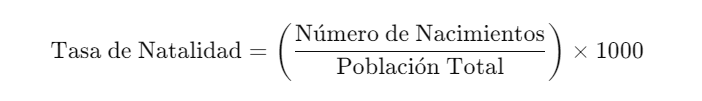

##**Creamos dataframe con el historico de los nacimientos**

In [2]:
file_id = '1YZ6o0pM2eAJGl-7KVMy40qX5I-VzlJoH'
url = f'https://drive.google.com/uc?id={file_id}'

output = 'nac_hist.csv'
gdown.download(url, output, quiet=False)

df1 = pd.read_csv('nac_hist.csv', encoding='ISO-8859-1')

df1


Downloading...
From (original): https://drive.google.com/uc?id=1YZ6o0pM2eAJGl-7KVMy40qX5I-VzlJoH
From (redirected): https://drive.google.com/uc?id=1YZ6o0pM2eAJGl-7KVMy40qX5I-VzlJoH&confirm=t&uuid=103452b0-1312-4744-8962-ec7841cf4479
To: /content/nac_hist.csv
100%|██████████| 252M/252M [00:02<00:00, 94.8MB/s]


,Unnamed: 0,COD_DPTO,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,...,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION,TIPOFORMULARIO
0,1,5,1,1,1,NaN,2,6,5,2019,...,1,NaN,1,2,2.0,22,3,9,1.0,NaN
1,2,23,1,1,1,NaN,1,4,4,2019,...,2,21/08/2008,3,2,2.0,24,4,11,1.0,NaN
2,3,44,1,1,1,NaN,1,6,5,2019,...,2,20/01/2015,2,1,1.0,32,99,99,1.0,NaN
3,4,41,1,1,1,NaN,1,8,5,2019,...,1,NaN,1,1,1.0,26,4,11,1.0,NaN
4,5,41,551,1,1,NaN,2,5,4,2019,...,2,18/05/2016,2,5,NaN,26,4,11,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462596,2462597,8,638,1,1,NaN,1,7,5,2022,...,2,13/09/2015,2,2,2.0,37,3,9,1.0,1.0
2462597,2462598,23,1,1,1,NaN,1,6,4,2022,...,4,22/10/2015,5,2,2.0,29,2,5,1.0,1.0
2462598,2462599,8,758,1,1,NaN,1,5,5,2022,...,2,18/07/2019,2,2,2.0,22,4,11,1.0,1.0
2462599,2462600,63,1,1,1,NaN,1,6,5,2022,...,3,24/01/2018,3,2,2.0,41,3,6,1.0,1.0


##**Tipos de variables**

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2462601 entries, 0 to 2462600
Data columns (total 40 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   COD_DPTO        int64  
 2   COD_MUNIC       int64  
 3   AREANAC         int64  
 4   SIT_PARTO       int64  
 5   OTRO_SIT        object 
 6   SEXO            int64  
 7   PESO_NAC        int64  
 8   TALLA_NAC       int64  
 9   ANO             int64  
 10  MES             int64  
 11  ATEN_PAR        int64  
 12  T_GES           int64  
 13  T_GES_AGRU_CIE  float64
 14  NUMCONSUL       int64  
 15  TIPO_PARTO      int64  
 16  MUL_PARTO       int64  
 17  APGAR1          int64  
 18  APGAR2          int64  
 19  IDHEMOCLAS      int64  
 20  IDFACTORRH      int64  
 21  IDPERTET        int64  
 22  EDAD_MADRE      int64  
 23  EST_CIVM        int64  
 24  NIV_EDUM        int64  
 25  ULTCURMAD       int64  
 26  CODPRES         float64
 27  CODPTORE        float64
 28  CODMUNRE    

##**Recuento de valores únicos por columna**

In [4]:
def analizar_valores_unicos(df1):
    """
    Analiza y muestra el conteo de valores únicos para cada columna en un DataFrame

    Args:
        df1 (pandas.DataFrame): DataFrame a analizar

    Returns:
        pandas.Series: Serie con el conteo de valores únicos por columna
    """

    valores_unicos = df1.nunique()

    for columna, conteo in valores_unicos.items():
        print(f"Columna: {columna}, Valores únicos: {conteo}")

    return valores_unicos


analizar_valores_unicos(df1)


def mostrar_ejemplos_unicos(df1, columna):
    """
    Muestra los valores únicos de una columna específica

    Args:
        df1 (pandas.DataFrame): DataFrame a analizar
        columna (str): Nombre de la columna a analizar
    """
    valores = df1[columna].unique()
    print(f"\nValores únicos en {columna}:")
    print(valores)

Columna: Unnamed: 0, Valores únicos: 2462601
Columna: COD_DPTO, Valores únicos: 33
Columna: COD_MUNIC, Valores únicos: 563
Columna: AREANAC, Valores únicos: 4
Columna: SIT_PARTO, Valores únicos: 4
Columna: OTRO_SIT, Valores únicos: 1676
Columna: SEXO, Valores únicos: 3
Columna: PESO_NAC, Valores únicos: 9
Columna: TALLA_NAC, Valores únicos: 7
Columna: ANO, Valores únicos: 4
Columna: MES, Valores únicos: 12
Columna: ATEN_PAR, Valores únicos: 7
Columna: T_GES, Valores únicos: 7
Columna: T_GES_AGRU_CIE, Valores únicos: 7
Columna: NUMCONSUL, Valores únicos: 27
Columna: TIPO_PARTO, Valores únicos: 5
Columna: MUL_PARTO, Valores únicos: 5
Columna: APGAR1, Valores únicos: 11
Columna: APGAR2, Valores únicos: 11
Columna: IDHEMOCLAS, Valores únicos: 5
Columna: IDFACTORRH, Valores únicos: 3
Columna: IDPERTET, Valores únicos: 7
Columna: EDAD_MADRE, Valores únicos: 10
Columna: EST_CIVM, Valores únicos: 7
Columna: NIV_EDUM, Valores únicos: 14
Columna: ULTCURMAD, Valores únicos: 15
Columna: CODPRES, V

##**Detección de nulos y análisis de variables a eliminar**

In [5]:
null_counts = df1.isnull().sum()
null_counts

,0
Unnamed: 0,0
COD_DPTO,0
COD_MUNIC,0
AREANAC,0
SIT_PARTO,0
OTRO_SIT,2457692
SEXO,0
PESO_NAC,0
TALLA_NAC,0
ANO,0


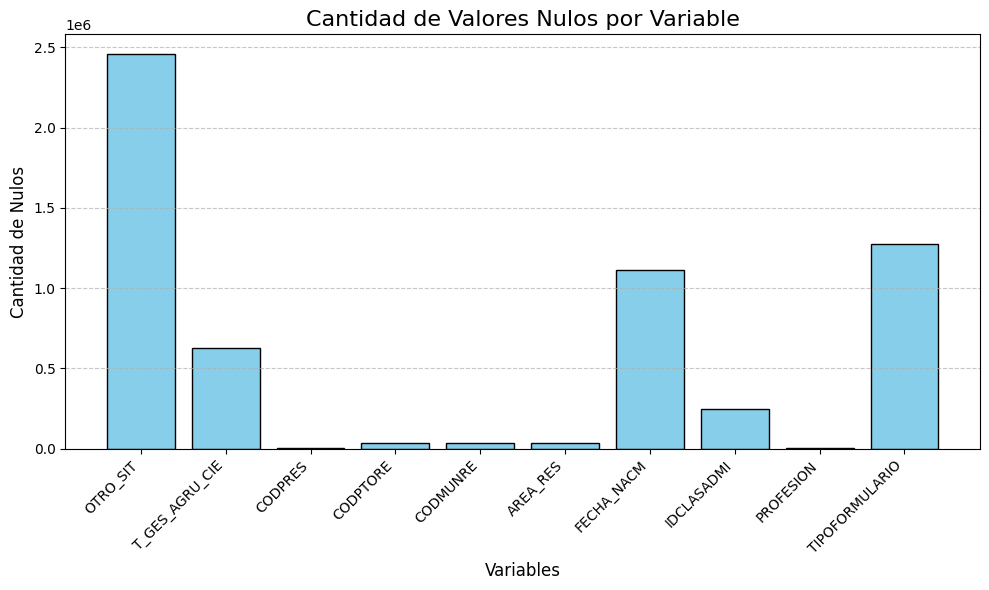

Unnamed: 0              0
COD_DPTO                0
COD_MUNIC               0
AREANAC                 0
SIT_PARTO               0
OTRO_SIT          2457692
SEXO                    0
PESO_NAC                0
TALLA_NAC               0
ANO                     0
MES                     0
ATEN_PAR                0
T_GES                   0
T_GES_AGRU_CIE     629402
NUMCONSUL               0
TIPO_PARTO              0
MUL_PARTO               0
APGAR1                  0
APGAR2                  0
IDHEMOCLAS              0
IDFACTORRH              0
IDPERTET                0
EDAD_MADRE              0
EST_CIVM                0
NIV_EDUM                0
ULTCURMAD               0
CODPRES              2085
CODPTORE            36621
CODMUNRE            36621
AREA_RES            36584
N_HIJOSV                0
FECHA_NACM        1113033
N_EMB                   0
SEG_SOCIAL              0
IDCLASADMI         245169
EDAD_PADRE              0
NIV_EDUP                0
ULTCURPAD               0
PROFESION   

In [6]:
nulos_por_variable = df1.isnull().sum()
nulos_por_variable = nulos_por_variable[nulos_por_variable > 0]
plt.figure(figsize=(10, 6))
plt.bar(nulos_por_variable.index, nulos_por_variable.values, color='skyblue', edgecolor='black')
plt.title('Cantidad de Valores Nulos por Variable', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Cantidad de Nulos', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
nulos_por_variable = df1.isnull().sum()
print(nulos_por_variable)


In [7]:
# Lista de columnas a eliminar
eliminar = [
    "IDCLASADMI","Unnamed: 0","TIPOFORMULARIO", "APGAR1",
    "APGAR2", "OTRO_SIT", "T_GES_AGRU_CIE", "FECHA_NACM",
    "PROFESION", "CODPRES", "CODPTORE", "CODMUNRE", "AREA_RES"]

# Filtrar columnas que existen en el DataFrame
columnas_existentes = [col for col in eliminar if col in df1.columns]

# Eliminar las columnas existentes del DataFrame
df1 = df1.drop(columns=eliminar)

# Verificar las columnas restantes
print("Columnas restantes en el DataFrame:")
print(df1.columns)

Columnas restantes en el DataFrame:
Index(['COD_DPTO', 'COD_MUNIC', 'AREANAC', 'SIT_PARTO', 'SEXO', 'PESO_NAC',
       'TALLA_NAC', 'ANO', 'MES', 'ATEN_PAR', 'T_GES', 'NUMCONSUL',
       'TIPO_PARTO', 'MUL_PARTO', 'IDHEMOCLAS', 'IDFACTORRH', 'IDPERTET',
       'EDAD_MADRE', 'EST_CIVM', 'NIV_EDUM', 'ULTCURMAD', 'N_HIJOSV', 'N_EMB',
       'SEG_SOCIAL', 'EDAD_PADRE', 'NIV_EDUP', 'ULTCURPAD'],
      dtype='object')


##**Conteo de duplicados**

In [8]:
  # Conteo duplicados en el DataFrame original
num_duplicados = df1.duplicated().sum()
print(f"Número de registros duplicados: {num_duplicados}")

# Nuevo DataFrame sin duplicados
df_clean = df1.drop_duplicates()
print(f"Tamaño del DataFrame original: {len(df1)}")
print(f"Tamaño del DataFrame sin duplicados: {len(df_clean)}")

# Cálculo del número de registros duplicados eliminados
registros_eliminados = len(df1) - len(df_clean)
print(f"Número de registros duplicados eliminados: {registros_eliminados}")

df_clean.head()


Número de registros duplicados: 7004
Tamaño del DataFrame original: 2462601
Tamaño del DataFrame sin duplicados: 2455597
Número de registros duplicados eliminados: 7004


,COD_DPTO,COD_MUNIC,AREANAC,SIT_PARTO,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,EDAD_MADRE,EST_CIVM,NIV_EDUM,ULTCURMAD,N_HIJOSV,N_EMB,SEG_SOCIAL,EDAD_PADRE,NIV_EDUP,ULTCURPAD
0,5,1,1,1,2,6,5,2019,1,1,...,2,2,4,11,1,1,2,22,3,9
1,23,1,1,1,1,4,4,2019,1,1,...,5,1,2,5,2,3,2,24,4,11
2,44,1,1,1,1,6,5,2019,1,1,...,3,1,99,99,2,2,1,32,99,99
3,41,1,1,1,1,8,5,2019,1,1,...,4,5,5,11,1,1,1,26,4,11
4,41,551,1,1,2,5,4,2019,1,1,...,4,5,9,2,2,2,5,26,4,11


##**Imputaciónes y visualizaciónes post imputación**

1. Se eliminan las variables innecesarias para el analisis.
2. Se garantiza que las variables númericas conserven su tipo u se reemplacen los valores (9, 99,999)
3. Se garantiza que las variables categoricas conserven su tipo con astype(category). NOTA: Anteriormente todas las columnas estaban quedando como flotantes. Esto era un error.


Información del DataFrame limpio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2462601 entries, 0 to 2462600
Data columns (total 27 columns):
 #   Column      Dtype   
---  ------      -----   
 0   COD_DPTO    category
 1   COD_MUNIC   int64   
 2   AREANAC     category
 3   SIT_PARTO   category
 4   SEXO        category
 5   PESO_NAC    Int64   
 6   TALLA_NAC   Int64   
 7   ANO         Int64   
 8   MES         category
 9   ATEN_PAR    category
 10  T_GES       category
 11  NUMCONSUL   Int64   
 12  TIPO_PARTO  category
 13  MUL_PARTO   Int64   
 14  IDHEMOCLAS  category
 15  IDFACTORRH  category
 16  IDPERTET    category
 17  EDAD_MADRE  Int64   
 18  EST_CIVM    category
 19  NIV_EDUM    category
 20  ULTCURMAD   category
 21  N_HIJOSV    Int64   
 22  N_EMB       Int64   
 23  SEG_SOCIAL  category
 24  EDAD_PADRE  Int64   
 25  NIV_EDUP    category
 26  ULTCURPAD   category
dtypes: Int64(9), category(17), int64(1)
memory usage: 248.9 MB
None

Análisis de valores nulos:


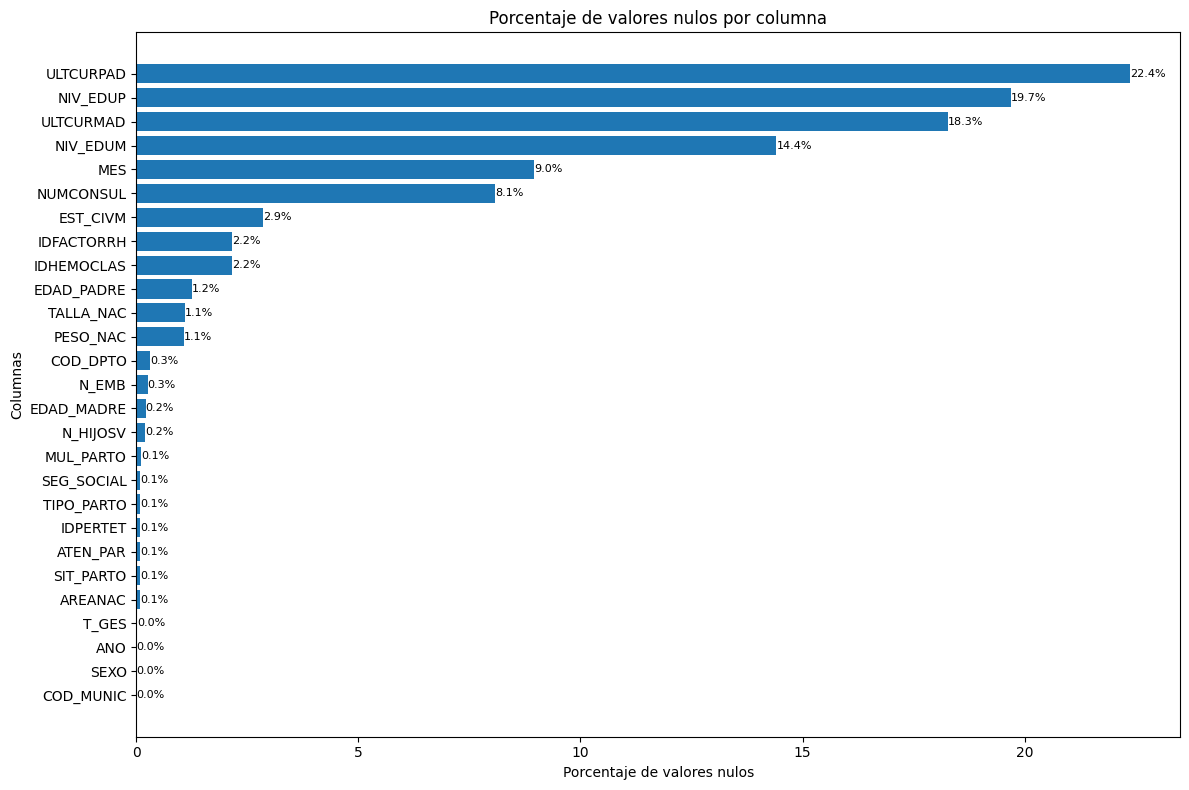

In [9]:
def limpiar_y_analizar_datos(df):
    """
    Limpia el DataFrame eliminando columnas innecesarias y tratando valores especiales

    Args:
        df (pandas.DataFrame): DataFrame original

    Returns:
        pandas.DataFrame: DataFrame limpio
    """
    # 1. Eliminamos columnas no deseadas
    columnas_a_eliminar = [
        "TIPOFORMULARIO", "_c0", "APGAR1",
        "APGAR2", "OTRO_SIT", "T_GES_AGRU_CIE", "FECHA_NACM",
        "PROFESION", "CODPRES", "CODPTORE", "CODMUNRE", "AREA_RES"
    ]

    df_clean1 = df.drop(columns=columnas_a_eliminar, errors='ignore')

    # 2. Definimos las variables según su tipo
    variables_categoricas = [
        'COD_DPTO', 'AREANAC', 'SIT_PARTO', 'SEXO', 'MES', 'ATEN_PAR',
        'T_GES', 'TIPO_PARTO', 'IDHEMOCLAS', 'IDFACTORRH', 'IDPERTET',
        'EST_CIVM', 'NIV_EDUM', 'SEG_SOCIAL', 'IDCLASADMI', 'NIV_EDUP',
        'ULTCURMAD', 'ULTCURPAD'
    ]

    variables_numericas = [
        'PESO_NAC', 'TALLA_NAC', 'NUMCONSUL', 'MUL_PARTO',
        'EDAD_MADRE', 'N_HIJOSV', 'N_EMB', 'EDAD_PADRE', 'ANO'
    ]

    # 3. Función para transformar los valores según el tipo de variable
    def transformar_valores(df, col):
        if col in variables_numericas:
           # Convertir valores especiales a NaN, respetando enteros
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Asegura que los valores no válidos sean NaN
            df.loc[df[col].isin([9, 99, 999]), col] = np.nan
            if df[col].dropna().apply(float.is_integer).all():  # Si todos los valores son enteros
                df[col] = df[col].astype('Int64')  # Convierte a tipo entero con soporte para NaN
        else:
            # Para variables categóricas, convertir valores especiales a None y luego a tipo 'category'
            df.loc[df[col].isin([9, 99, 999]), col] = None
            df[col] = df[col].astype('category')
        return df

    # 4. Aplicar las transformaciones
    for columna in df_clean1.columns:
        if columna in variables_categoricas + variables_numericas:
            df_clean1 = transformar_valores(df_clean1, columna)

    return df_clean1

def analizar_valores_nulos(df):
    """
    Analiza y visualiza el porcentaje de valores nulos por columna

    Args:
        df (pandas.DataFrame): DataFrame a analizar
    """
    # Calcular porcentaje de valores nulos
    null_percentages = (df.isnull().sum() * 100 / len(df)).sort_values()

    # Crear el gráfico
    plt.figure(figsize=(12, 8))
    bars = plt.barh(null_percentages.index, null_percentages.values)

    # Personalizar el gráfico
    plt.xlabel('Porcentaje de valores nulos')
    plt.ylabel('Columnas')
    plt.title('Porcentaje de valores nulos por columna')

    # Añadir etiquetas de porcentaje en las barras
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height() / 2,
                f'{width:.1f}%',
                ha='left', va='center', fontsize=8)

    # Ajustar márgenes y mostrar el gráfico
    plt.tight_layout()
    plt.show()

    return null_percentages

# Aplicar la limpieza y el análisis
df_clean = limpiar_y_analizar_datos(df1)

# Mostrar información básica del DataFrame limpio
print("\nInformación del DataFrame limpio:")
print(df_clean.info())

# Analizar valores nulos
print("\nAnálisis de valores nulos:")
null_percentages = analizar_valores_nulos(df_clean)


Muestra de datos después de imputar niveles educativos:
  NIV_EDUP NIV_EDUM
0      3.0      4.0
1      4.0      2.0
2      NaN      NaN
3      4.0      5.0
4      4.0      2.0

Moda de MES: 10.0


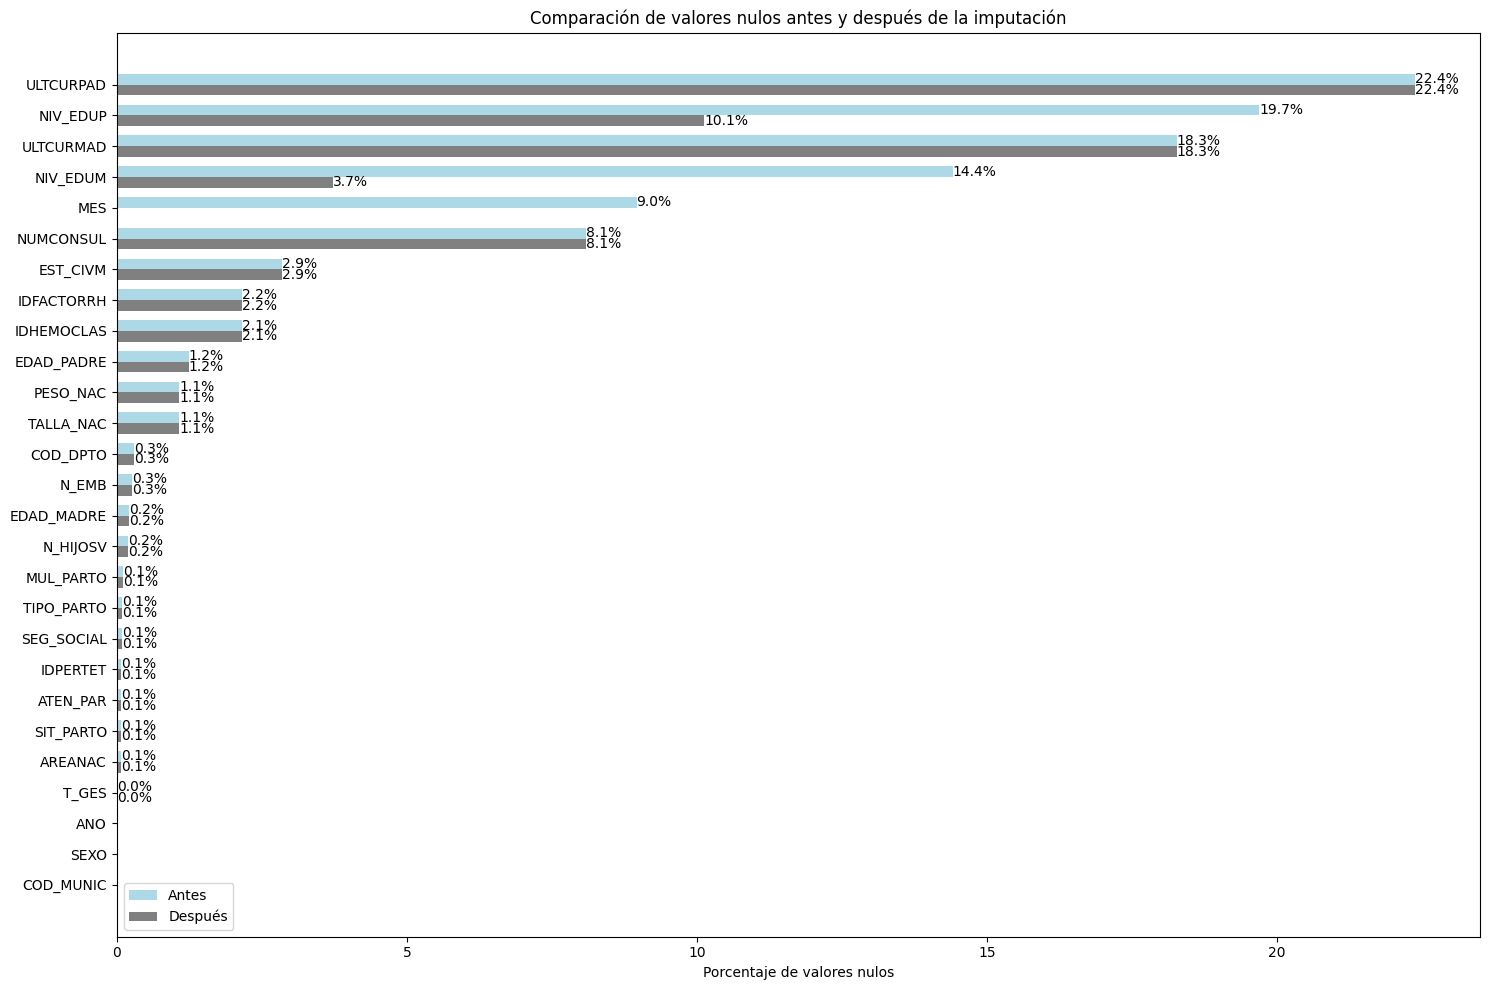


Estadísticas de la imputación:
MES: Se imputaron 8.96% de los valores
NIV_EDUM: Se imputaron 10.69% de los valores
NIV_EDUP: Se imputaron 9.56% de los valores

Muestra final de los datos imputados:
  NIV_EDUP NIV_EDUM  MES  NUMCONSUL
0      3.0      4.0  1.0          7
1      4.0      2.0  1.0          5
2      NaN      NaN  1.0          7
3      4.0      5.0  1.0         10
4      4.0      2.0  1.0          8

Estadísticas descriptivas después de la imputación:
          COD_MUNIC   PESO_NAC  TALLA_NAC          ANO  NUMCONSUL  MUL_PARTO  \
count  2.462601e+06  2436128.0  2435906.0    2462601.0  2263669.0  2460033.0   
mean   1.645697e+02   5.693597   4.557057  2020.455414   5.679717   1.017943   
std    2.621238e+02   1.055092   0.520212     1.111673   2.694349   0.136357   
min    1.000000e+00        1.0        1.0       2019.0        0.0        1.0   
25%    1.000000e+00        5.0        4.0       2019.0        4.0        1.0   
50%    1.000000e+00        6.0        5.0       2020

In [10]:
def imputar_datos(df):
    """
    Realiza la imputación de datos para niveles educativos y mes

    Args:
        df (pandas.DataFrame): DataFrame a imputar

    Returns:
        pandas.DataFrame: DataFrame con datos imputados
    """
    # Convertir las columnas categóricas a object para evitar conflictos
  # Convertir las columnas categóricas a object para evitar conflictos
    df['NIV_EDUP'] = df['NIV_EDUP'].astype('object')
    df['NIV_EDUM'] = df['NIV_EDUM'].astype('object')
    df['ULTCURPAD'] = df['ULTCURPAD'].astype('object')
    df['ULTCURMAD'] = df['ULTCURMAD'].astype('object')

    # 1. Imputación de niveles educativos padre y madre
    df['NIV_EDUP'] = df['NIV_EDUP'].fillna(df['ULTCURPAD'])
    df['NIV_EDUM'] = df['NIV_EDUM'].fillna(df['ULTCURMAD'])

    # Convertir las columnas de nuevo a category si es necesario
    df['NIV_EDUP'] = df['NIV_EDUP'].astype('category')
    df['NIV_EDUM'] = df['NIV_EDUM'].astype('category')

    # Mostrar muestra de datos después de imputar niveles educativos
    print("Muestra de datos después de imputar niveles educativos:")
    print(df[['NIV_EDUP', 'NIV_EDUM']].head())

    # 2. Imputación de MES usando la moda
    mes_moda = df['MES'].mode()[0] if not df['MES'].mode().empty else 6
    print(f'\nModa de MES: {mes_moda}')

    df['MES'] = df['MES'].fillna(mes_moda)

    return df

def visualizar_nulos_antes_despues(df_antes, df_despues):
    """
    Crea una visualización comparativa de valores nulos antes y después de la imputación

    Args:
        df_antes (pandas.DataFrame): DataFrame antes de la imputación
        df_despues (pandas.DataFrame): DataFrame después de la imputación
    """
    # Calcular porcentajes de valores nulos
    nulos_antes = (df_antes.isnull().sum() * 100 / len(df_antes)).round(2)
    nulos_despues = (df_despues.isnull().sum() * 100 / len(df_despues)).round(2)

    # Crear DataFrame comparativo
    comparacion = pd.DataFrame({
        'Antes': nulos_antes,
        'Después': nulos_despues
    }).sort_values('Antes', ascending=True)

    # Crear visualización
    plt.figure(figsize=(15, 10))

    # Crear barras
    x = np.arange(len(comparacion.index))
    width = 0.35

    plt.barh(x + width/2, comparacion['Antes'], width, label='Antes', color='lightblue')
    plt.barh(x - width/2, comparacion['Después'], width, label='Después', color='grey')

    # Personalizar gráfico
    plt.yticks(x, comparacion.index)
    plt.xlabel('Porcentaje de valores nulos')
    plt.title('Comparación de valores nulos antes y después de la imputación')
    plt.legend()

    # Añadir etiquetas de porcentaje
    for i, (antes, despues) in enumerate(zip(comparacion['Antes'], comparacion['Después'])):
        if antes > 0:
            plt.text(antes, i + width/2, f'{antes:.1f}%', va='center', ha='left')
        if despues > 0:
            plt.text(despues, i - width/2, f'{despues:.1f}%', va='center', ha='left')

    plt.tight_layout()
    plt.show()

    # Mostrar estadísticas de la imputación
    print("\nEstadísticas de la imputación:")
    for columna in comparacion.index:
        diff = nulos_antes[columna] - nulos_despues[columna]
        if diff > 0:
            print(f"{columna}: Se imputaron {diff:.2f}% de los valores")

# Guardar una copia del DataFrame antes de la imputación para la comparación
df_antes = df_clean.copy()

# Realizar la imputación directamente en nac_df_clean
imputar_datos(df_clean)

# Visualizar la comparación de valores nulos
visualizar_nulos_antes_despues(df_antes, df_clean)

# Mostrar muestra final de los datos imputados
print("\nMuestra final de los datos imputados:")
print(df_clean[['NIV_EDUP', 'NIV_EDUM', 'MES', 'NUMCONSUL']].head())

# Mostrar estadísticas descriptivas después de la imputación
print("\nEstadísticas descriptivas después de la imputación:")
print(df_clean.describe())

In [ ]:
# Eliminar las columnas ULTCURMAD y ULTCURPAD directamente del DataFrame nac_df_clean
df_clean.drop(columns=['ULTCURMAD', 'ULTCURPAD'], inplace=True)

# Verificar que las columnas se eliminaron
print("\nColumnas después de eliminar ULTCURMAD y ULTCURPAD:")
print(df_clean.columns)


Columnas después de eliminar ULTCURMAD y ULTCURPAD:
Index(['COD_DPTO', 'COD_MUNIC', 'AREANAC', 'SIT_PARTO', 'SEXO', 'PESO_NAC',
       'TALLA_NAC', 'ANO', 'MES', 'ATEN_PAR', 'T_GES', 'NUMCONSUL',
       'TIPO_PARTO', 'MUL_PARTO', 'IDHEMOCLAS', 'IDFACTORRH', 'IDPERTET',
       'EDAD_MADRE', 'EST_CIVM', 'NIV_EDUM', 'N_HIJOSV', 'N_EMB', 'SEG_SOCIAL',
       'EDAD_PADRE', 'NIV_EDUP'],
      dtype='object')


Columnas en el DataFrame después de eliminar variables:
['COD_DPTO', 'COD_MUNIC', 'AREANAC', 'SIT_PARTO', 'SEXO', 'PESO_NAC', 'TALLA_NAC', 'ANO', 'MES', 'ATEN_PAR', 'T_GES', 'NUMCONSUL', 'TIPO_PARTO', 'MUL_PARTO', 'IDHEMOCLAS', 'IDFACTORRH', 'IDPERTET', 'EDAD_MADRE', 'EST_CIVM', 'NIV_EDUM', 'ULTCURMAD', 'N_HIJOSV', 'N_EMB', 'SEG_SOCIAL', 'EDAD_PADRE', 'NIV_EDUP', 'ULTCURPAD']

Moda de NIV_EDUP: 4.0
Moda de NIV_EDUM: 4.0

Muestra de datos después de la imputación:
  NIV_EDUP NIV_EDUM
0      3.0      4.0
1      4.0      2.0
2      4.0      4.0
3      4.0      5.0
4      4.0      2.0

Distribución de frecuencias de NIV_EDUP:
NIV_EDUP
4.0    1109429
3.0     429643
2.0     344768
5.0     246169
7.0     140268
Name: count, dtype: int64

Distribución de frecuencias de NIV_EDUM:
NIV_EDUM
4.0    938297
3.0    542606
2.0    290348
5.0    273683
7.0    203179
Name: count, dtype: int64


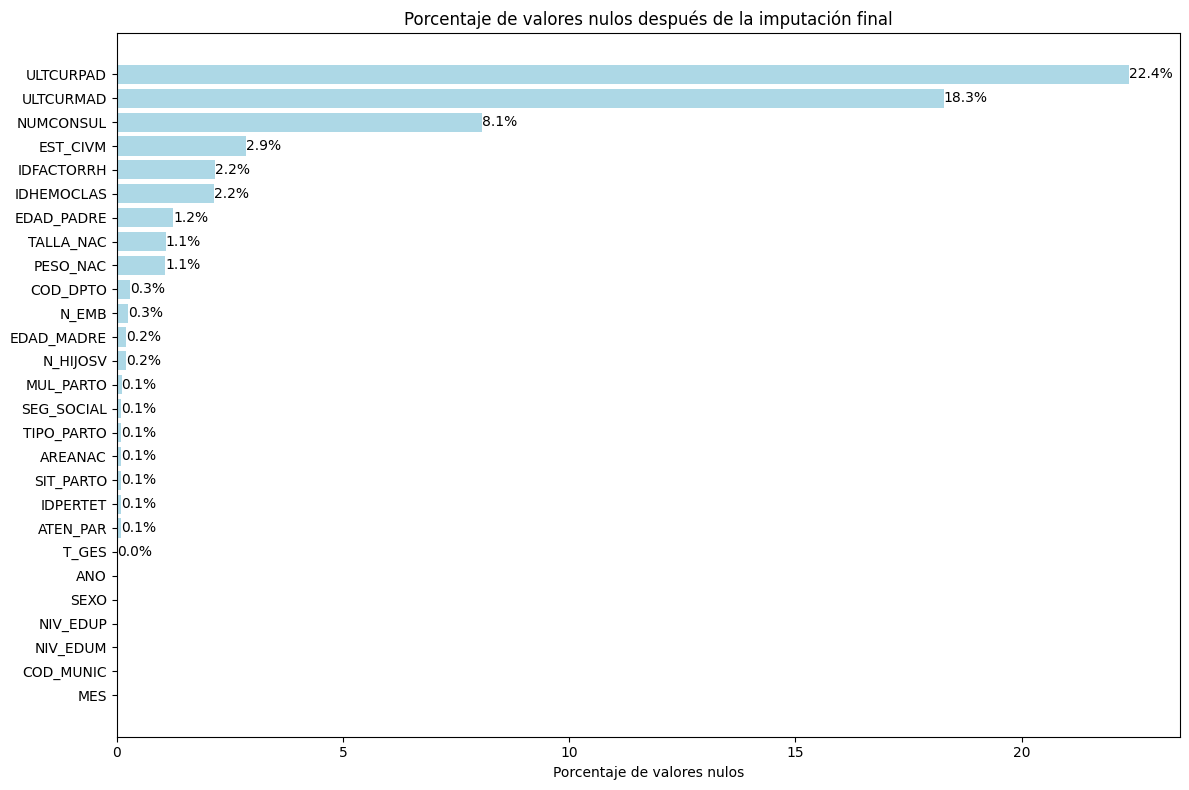


Porcentaje de nulos después de la imputación:
NIV_EDUP    0.0
NIV_EDUM    0.0
dtype: float64


In [11]:
def limpiar_y_realizar_segunda_imputacion(df):
    """
    Elimina columnas innecesarias y realiza la segunda imputación de niveles educativos

    Args:
        df (pandas.DataFrame): DataFrame original

    Returns:
        pandas.DataFrame: DataFrame limpio e imputado
    """
    print("Columnas en el DataFrame después de eliminar variables:")
    print(df_clean.columns.tolist())

    # 2. Calcular la moda de NIV_EDUP y NIV_EDUM (excluyendo nulos)
    mode_niv_edup = df_clean['NIV_EDUP'].mode()[0]
    mode_niv_edum = df_clean['NIV_EDUM'].mode()[0]

    print(f'\nModa de NIV_EDUP: {mode_niv_edup}')
    print(f'Moda de NIV_EDUM: {mode_niv_edum}')

    # 3. Imputar valores nulos usando la moda
    df_clean['NIV_EDUP'] = df_clean['NIV_EDUP'].fillna(mode_niv_edup)
    df_clean['NIV_EDUM'] = df_clean['NIV_EDUM'].fillna(mode_niv_edum)

    # 4. Mostrar muestra de los datos imputados
    print('\nMuestra de datos después de la imputación:')
    print(df_clean[['NIV_EDUP', 'NIV_EDUM']].head())

    # 5. Mostrar distribución de frecuencias
    print('\nDistribución de frecuencias de NIV_EDUP:')
    print(df_clean['NIV_EDUP'].value_counts().head())

    print('\nDistribución de frecuencias de NIV_EDUM:')
    print(df_clean['NIV_EDUM'].value_counts().head())

    return df_clean

def visualizar_nulos_final(df):
    """
    Crea una visualización de valores nulos después de la imputación

    Args:
        df (pandas.DataFrame): DataFrame después de la imputación
    """
    # Calcular porcentajes de valores nulos
    nulos = (df.isnull().sum() * 100 / len(df)).sort_values(ascending=True)

    # Crear visualización
    plt.figure(figsize=(12, 8))

    # Crear barras
    bars = plt.barh(range(len(nulos)), nulos.values, color='lightblue')

    # Personalizar gráfico
    plt.yticks(range(len(nulos)), nulos.index)
    plt.xlabel('Porcentaje de valores nulos')
    plt.title('Porcentaje de valores nulos después de la imputación final')

    # Añadir etiquetas de porcentaje
    for i, bar in enumerate(bars):
        width = bar.get_width()
        if width > 0:  # Solo mostrar etiqueta si hay valores nulos
            plt.text(width, i, f'{width:.1f}%',
                    va='center', ha='left')

    plt.tight_layout()
    plt.show()

    # Mostrar porcentajes específicos para NIV_EDUP y NIV_EDUM
    print("\nPorcentaje de nulos después de la imputación:")
    print(nulos[['NIV_EDUP', 'NIV_EDUM']].round(2))

# Realizar la limpieza y segunda imputación
df_clean = limpiar_y_realizar_segunda_imputacion(df_clean)

# Visualizar los valores nulos finales
visualizar_nulos_final(df_clean)

Valores nulos por columna antes de la limpieza:
COD_DPTO        7422
COD_MUNIC          0
AREANAC         2083
SIT_PARTO       2083
SEXO               0
PESO_NAC       26473
TALLA_NAC      26695
ANO                0
MES                0
ATEN_PAR        2083
T_GES            333
NUMCONSUL     198932
TIPO_PARTO      2266
MUL_PARTO       2568
IDHEMOCLAS     52954
IDFACTORRH     53184
IDPERTET        2083
EDAD_MADRE      5075
EST_CIVM       70307
NIV_EDUM           0
ULTCURMAD     450003
N_HIJOSV        5043
N_EMB           6281
SEG_SOCIAL      2267
EDAD_PADRE     30653
NIV_EDUP           0
ULTCURPAD     551158
dtype: int64

Porcentaje de nulos por columna:
COD_DPTO       0.30
COD_MUNIC      0.00
AREANAC        0.08
SIT_PARTO      0.08
SEXO           0.00
PESO_NAC       1.08
TALLA_NAC      1.08
ANO            0.00
MES            0.00
ATEN_PAR       0.08
T_GES          0.01
NUMCONSUL      8.08
TIPO_PARTO     0.09
MUL_PARTO      0.10
IDHEMOCLAS     2.15
IDFACTORRH     2.16
IDPERTET       0.0

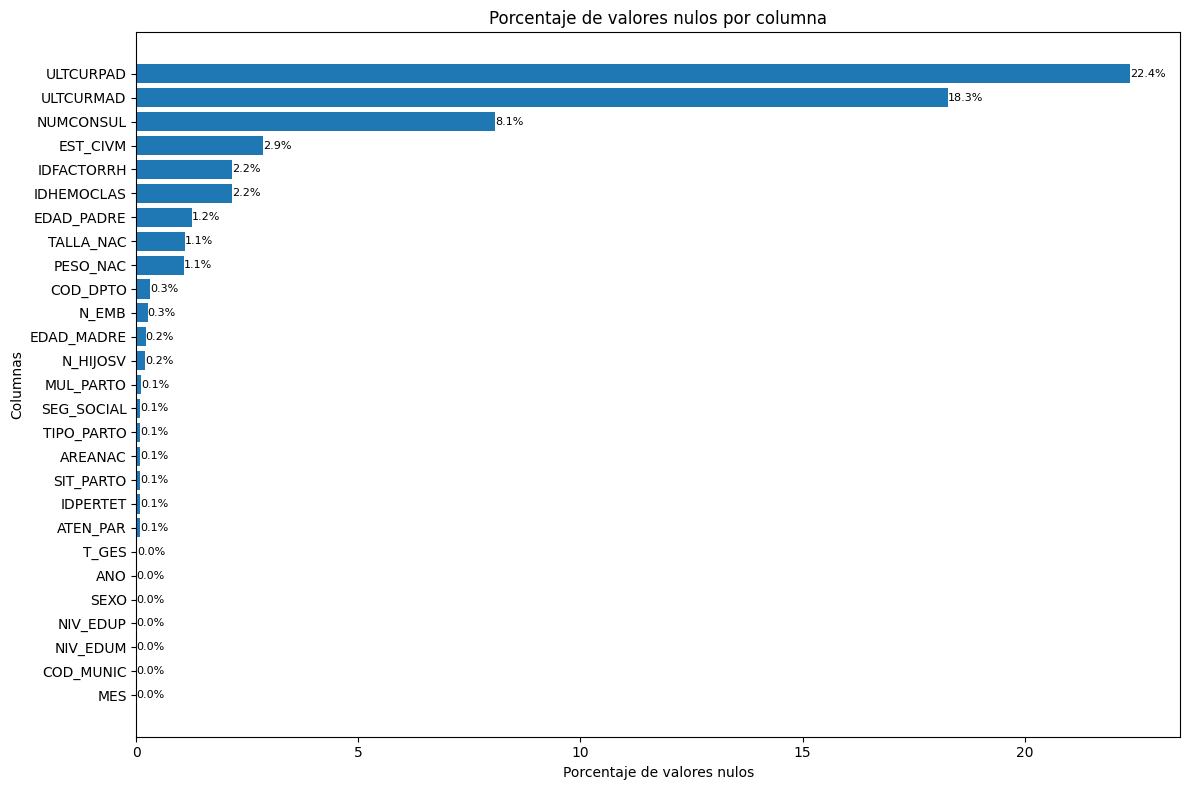

In [12]:
# Ver nulos antes de la limpieza
print("Valores nulos por columna antes de la limpieza:")
print(df_clean.isnull().sum())
print("\nPorcentaje de nulos por columna:")
print((df_clean.isnull().sum() / len(df_clean) * 100).round(2))

# Ejecutar el análisis de nulos
nac_clean_sin_nulos = analizar_valores_nulos(df_clean)

In [ ]:
# Contar registros con valores nulos
nulos_totales = df_clean.isnull().sum().sum()
print(f"Total de registros con valores nulos: {nulos_totales}")

# Eliminar registros con valores nulos
df_clean.dropna(inplace=True)

# Verificar que no haya nulos
nulos_totales_despues = df_clean.isnull().sum().sum()
print(f"Total de registros con valores nulos después de la eliminación: {nulos_totales_despues}")

Total de registros con valores nulos: 498785
Total de registros con valores nulos después de la eliminación: 0


In [26]:
df_clean

,COD_DPTO,AREANAC,ANO,COD_MUNIC,MES,NIV_EDUM,NIV_EDUP,N_DPTO
0,5.0,1.0,2019,1,1.0,4.0,3.0,Antioquia
1,23.0,1.0,2019,1,1.0,2.0,4.0,Córdoba
2,44.0,1.0,2019,1,1.0,4.0,4.0,La Guajira
3,41.0,1.0,2019,1,1.0,5.0,4.0,Huila
4,41.0,1.0,2019,551,1.0,2.0,4.0,Huila
...,...,...,...,...,...,...,...,...
2462596,8.0,1.0,2022,638,7.0,3.0,3.0,Atlántico
2462597,23.0,1.0,2022,1,7.0,3.0,2.0,Córdoba
2462598,8.0,1.0,2022,758,7.0,4.0,4.0,Atlántico
2462599,63.0,1.0,2022,1,7.0,3.0,3.0,Quindío


In [ ]:
# Cuenta los registros nulos por cada variable del DataFrame nac_df_clean
null_counts = df_clean.isnull().sum()
null_counts

,0
COD_DPTO,0
COD_MUNIC,0
AREANAC,0
SIT_PARTO,0
SEXO,0
PESO_NAC,0
TALLA_NAC,0
ANO,0
MES,0
ATEN_PAR,0


##**Distribución de variables categoricas**

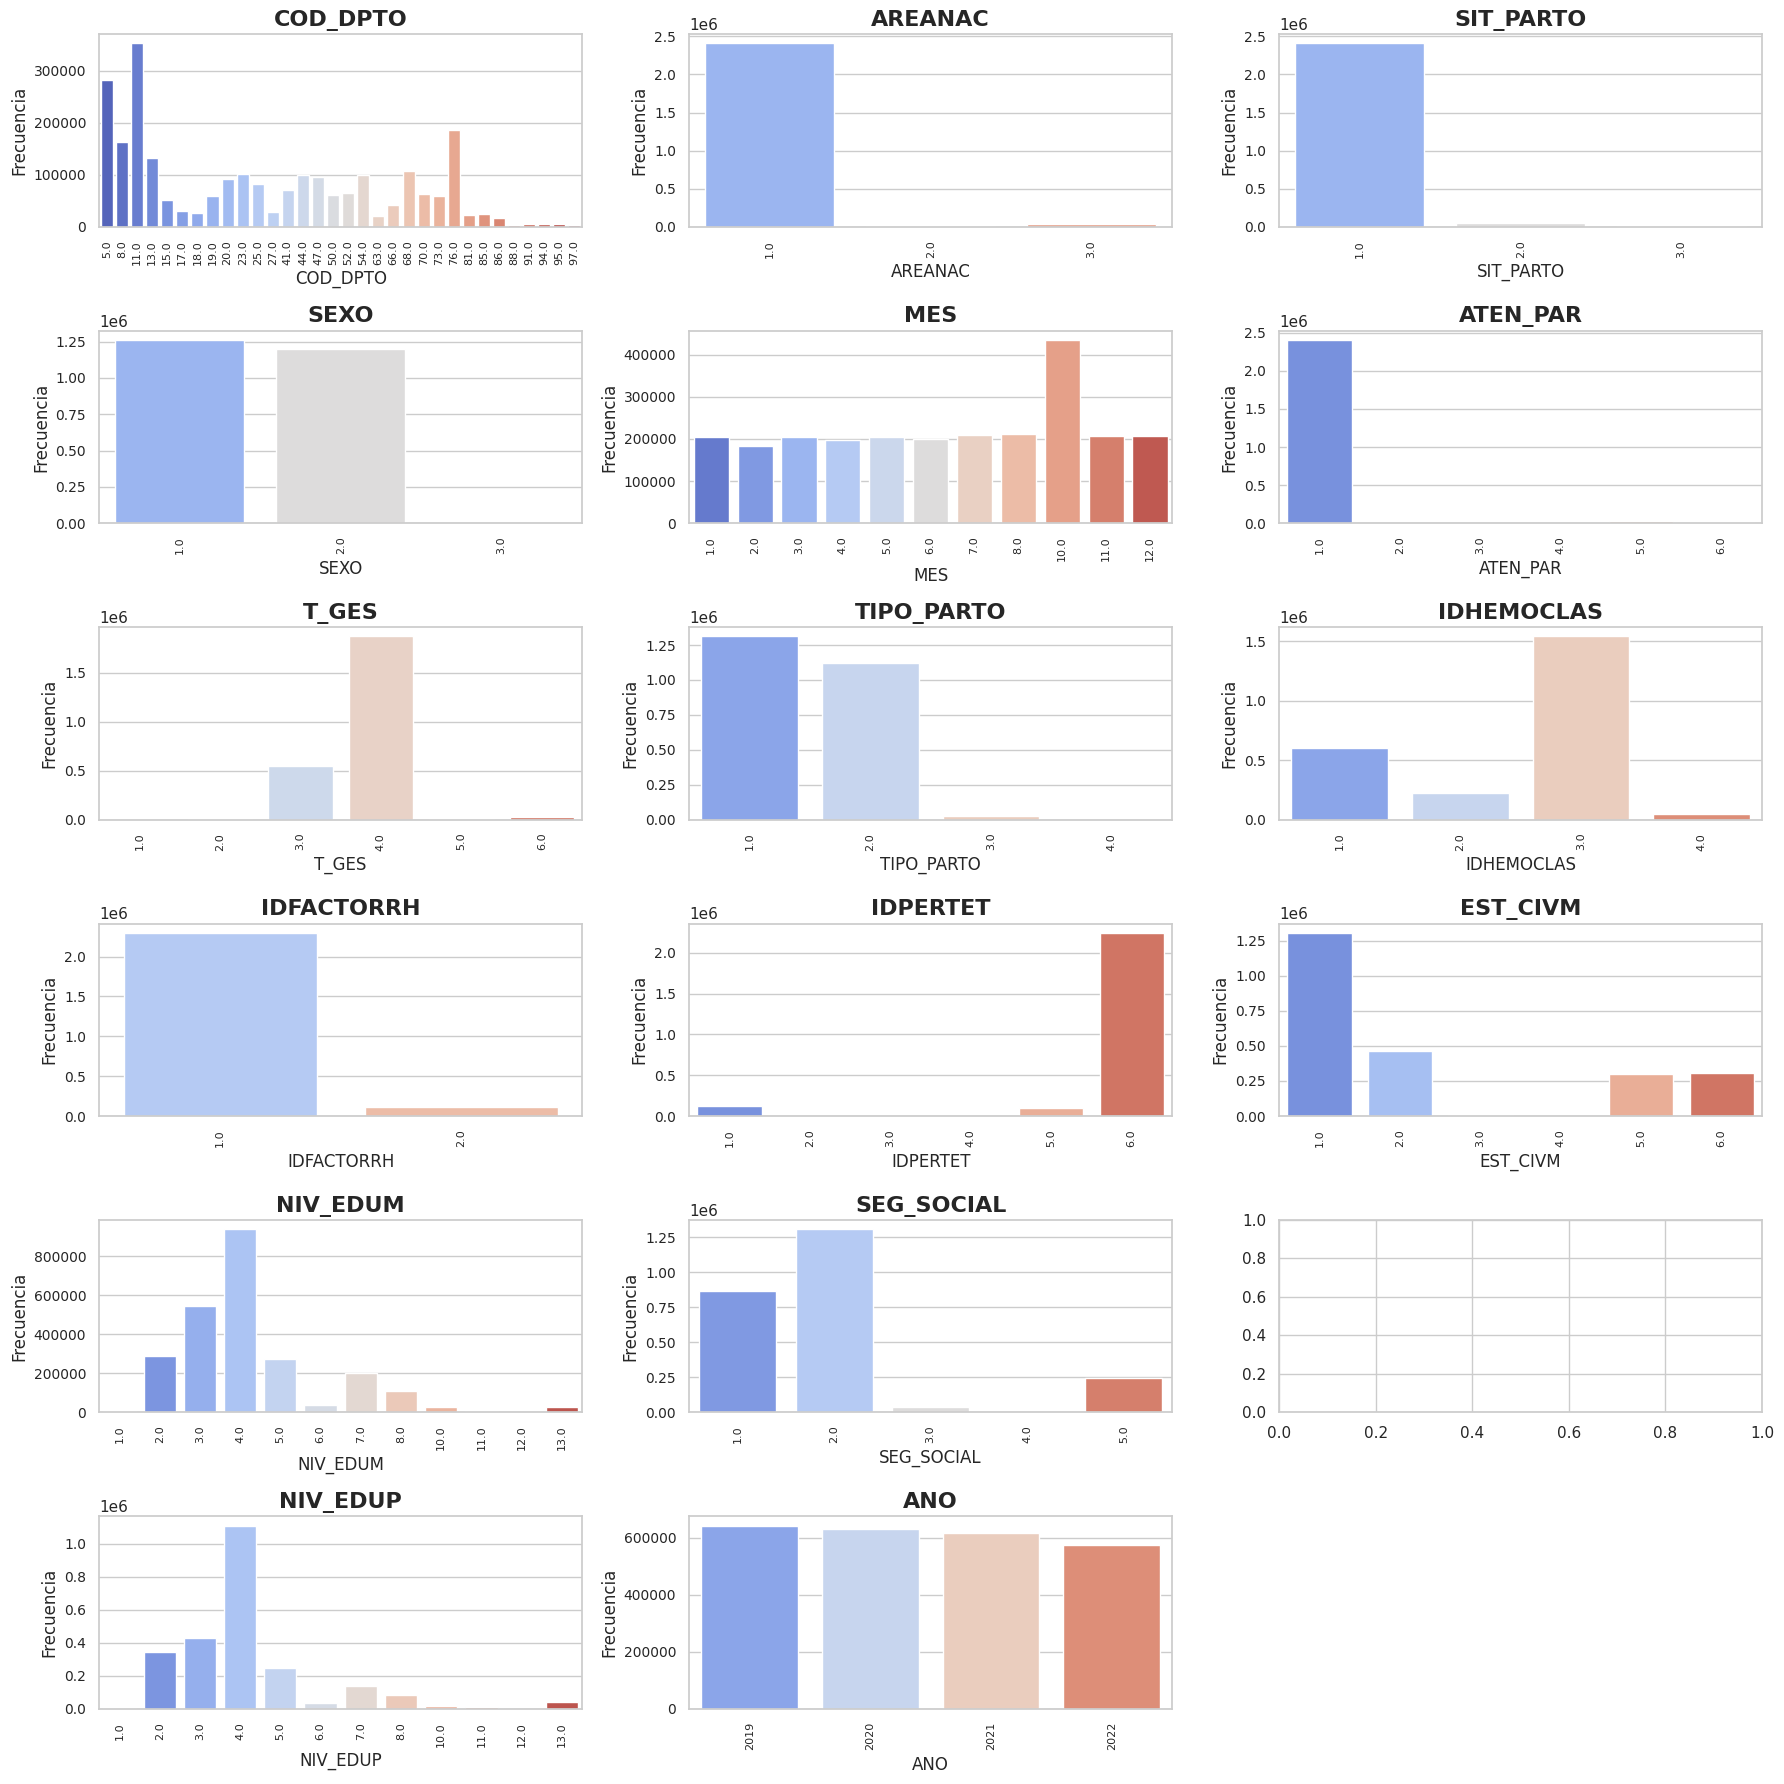

In [13]:
variables_categoricas = [
        'COD_DPTO', 'AREANAC', 'SIT_PARTO', 'SEXO', 'MES', 'ATEN_PAR',
        'T_GES', 'TIPO_PARTO', 'IDHEMOCLAS', 'IDFACTORRH', 'IDPERTET',
        'EST_CIVM', 'NIV_EDUM', 'SEG_SOCIAL', 'IDCLASADMI', 'NIV_EDUP',
        'ANO']


# Usar el estilo moderno de Seaborn
sns.set(style="whitegrid")

# Crear una figura y subgráficos para cada variable categórica
n_variables = len(variables_categoricas)
cols = 3  # Número de columnas por fila
rows = (n_variables // cols) + (n_variables % cols > 0)  # Calcular filas necesarias

# Crear la figura con el tamaño adecuado
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3))
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

# Crear un gráfico de barras para cada variable categórica
for i, variable in enumerate(variables_categoricas):
    # Check if the column exists in the DataFrame
    if variable in df_clean.columns:
        # Contar la frecuencia de cada categoría en la variable
        sns.countplot(data=df_clean, x=variable, palette="coolwarm", ax=axes[i])

        # Ajustes para cada gráfico
        axes[i].set_title(f'{variable}', fontsize=16, weight='bold')
        axes[i].set_xlabel(variable, fontsize=12)
        axes[i].set_ylabel('Frecuencia', fontsize=12)

        # Mejorar la visibilidad de las etiquetas del eje X (rotar si es necesario)
        axes[i].tick_params(axis='x', rotation=90, labelsize=8)
        axes[i].tick_params(axis='y', labelsize=10)
    else:
        print(f"Warning: Column '{variable}' not found in DataFrame. Skipping...")

# Eliminar ejes vacíos si hay menos variables que subgráficos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar márgenes y mostrar la figura
plt.tight_layout()
plt.show()

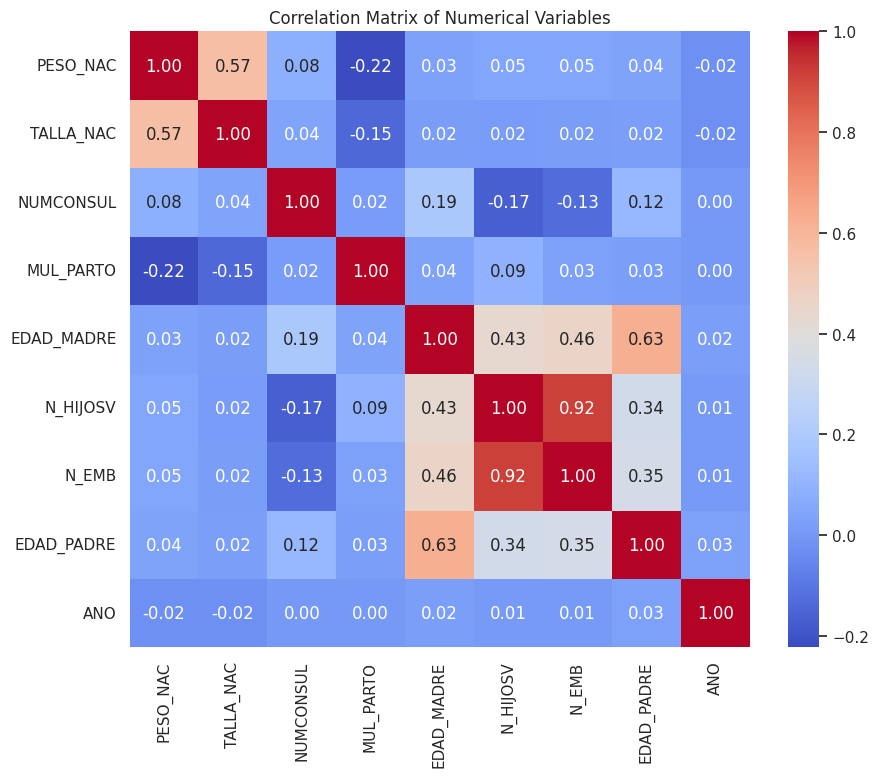

In [14]:
# Genera un codigo para una matriz de correlación con la siguiente lista de variables

variables_numericas = [
         'PESO_NAC', 'TALLA_NAC', 'NUMCONSUL', 'MUL_PARTO',
         'EDAD_MADRE', 'N_HIJOSV', 'N_EMB', 'EDAD_PADRE', 'ANO'
     ]

# Calculate the correlation matrix
correlation_matrix = df_clean[variables_numericas].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

##**Preparación del dataset para los modelos**

Descodificamos los departamentos usando "map".

In [15]:
print(df_clean['COD_DPTO'].dtype)


category


In [16]:
df_clean['COD_DPTO'] = df_clean['COD_DPTO'].astype(int, errors='ignore')


In [17]:
print(df_clean['COD_DPTO'].unique())


[5.0, 23.0, 44.0, 41.0, 54.0, ..., 91.0, 95.0, 88.0, 97.0, 94.0]
Length: 33
Categories (32, float64): [5.0, 8.0, 11.0, 13.0, ..., 91.0, 94.0, 95.0, 97.0]


In [18]:
print(df_clean['COD_DPTO'].unique())
print(df_clean['COD_DPTO'].dtype)


[5.0, 23.0, 44.0, 41.0, 54.0, ..., 91.0, 95.0, 88.0, 97.0, 94.0]
Length: 33
Categories (32, float64): [5.0, 8.0, 11.0, 13.0, ..., 91.0, 94.0, 95.0, 97.0]
category


In [19]:
df_clean['COD_DPTO'] = pd.to_numeric(df_clean['COD_DPTO'], errors='coerce')


In [20]:
df_clean['COD_DPTO'] = df_clean['COD_DPTO'].astype(int)


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [21]:
departamentos = {
    5: "Antioquia", 8: "Atlántico", 11: "Bogotá D.C.", 13: "Bolívar", 15: "Boyacá",
    17: "Caldas", 18: "Caquetá", 19: "Cauca", 20: "Cesar", 23: "Córdoba",
    25: "Cundinamarca", 27: "Chocó", 41: "Huila", 44: "La Guajira",
    47: "Magdalena", 50: "Meta", 52: "Nariño", 54: "Norte de Santander",
    63: "Quindío", 66: "Risaralda", 68: "Santander", 70: "Sucre", 73: "Tolima",
    76: "Valle del Cauca", 81: "Arauca", 85: "Casanare", 86: "Putumayo",
    88: "San Andrés y Providencia", 91: "Amazonas",
    94: "Guainía", 95: "Guaviare", 97: "Vaupés", 99: "Vichada"
}

In [22]:
df_clean['N_DPTO'] = df_clean['COD_DPTO'].map(departamentos)


In [23]:
print(df_clean[['COD_DPTO', 'N_DPTO']].head())


   COD_DPTO      N_DPTO
0       5.0   Antioquia
1      23.0     Córdoba
2      44.0  La Guajira
3      41.0       Huila
4      41.0       Huila


##**Selección de las variables de interés**

In [24]:
df_clean = df_clean[['COD_DPTO', 'AREANAC','ANO','COD_MUNIC', 'MES', 'NIV_EDUM', 'NIV_EDUP','N_DPTO']]
df_clean

,COD_DPTO,AREANAC,ANO,COD_MUNIC,MES,NIV_EDUM,NIV_EDUP,N_DPTO
0,5.0,1.0,2019,1,1.0,4.0,3.0,Antioquia
1,23.0,1.0,2019,1,1.0,2.0,4.0,Córdoba
2,44.0,1.0,2019,1,1.0,4.0,4.0,La Guajira
3,41.0,1.0,2019,1,1.0,5.0,4.0,Huila
4,41.0,1.0,2019,551,1.0,2.0,4.0,Huila
...,...,...,...,...,...,...,...,...
2462596,8.0,1.0,2022,638,7.0,3.0,3.0,Atlántico
2462597,23.0,1.0,2022,1,7.0,3.0,2.0,Córdoba
2462598,8.0,1.0,2022,758,7.0,4.0,4.0,Atlántico
2462599,63.0,1.0,2022,1,7.0,3.0,3.0,Quindío


##**Agregamos la población total por Departamento y mes**

In [25]:
df_clean['COD_DPTO'] = df_clean['COD_DPTO'].astype(str)
df_clean['COD_MUNIC'] = df_clean['COD_MUNIC'].astype(str)
df_clean['ANO'] = df_clean['ANO'].astype(str)
df_clean['MES'] = df_clean['MES'].astype(str)
archivo_poblacion = "https://docs.google.com/spreadsheets/d/1t6dqNIrI-6LTBlvgOE5vFSaquMe6oVp1/export?format=xlsx"
df_clean_poblacion = pd.read_excel(archivo_poblacion)


print(df_clean_poblacion.head())

# Nos aseguramos de que los nombres de las columnas coincidan para realizar el merge
df_clean_poblacion = df_clean_poblacion.rename(columns={'Departamento': 'N_DPTO', 'ANIO': 'ANO'})
df_clean_poblacion['ANO'] = df_clean_poblacion['ANO'].astype(str)

# Hacemos el merge para agregar la columna PTOTAL al DataFrame df_clean
df_clean_merge = df_clean.merge(df_clean_poblacion[['N_DPTO', 'ANO', 'PTOTAL']], on=['N_DPTO', 'ANO'], how='left')
df_clean_merge

# df_clean_poblacion[(df_clean_poblacion['N_DPTO'] == 'Antioquia') & (df_clean_poblacion['ANO'] == '2019')]

  Departamento  ANIO   PTOTAL
0     Amazonas  2019     7902
1    Antioquia  2019  6549124
2       Arauca  2019   286436
3    Atlántico  2019  2643820
4    Bogotá DC  2019  7674366


,COD_DPTO,AREANAC,ANO,COD_MUNIC,MES,NIV_EDUM,NIV_EDUP,N_DPTO,PTOTAL
0,5.0,1.0,2019,1,1.0,4.0,3.0,Antioquia,6549124.0
1,23.0,1.0,2019,1,1.0,2.0,4.0,Córdoba,1832585.0
2,44.0,1.0,2019,1,1.0,4.0,4.0,La Guajira,954067.0
3,41.0,1.0,2019,1,1.0,5.0,4.0,Huila,1126911.0
4,41.0,1.0,2019,551,1.0,2.0,4.0,Huila,1126911.0
...,...,...,...,...,...,...,...,...,...
2462596,8.0,1.0,2022,638,7.0,3.0,3.0,Atlántico,2793355.0
2462597,23.0,1.0,2022,1,7.0,3.0,2.0,Córdoba,1862585.0
2462598,8.0,1.0,2022,758,7.0,4.0,4.0,Atlántico,2793355.0
2462599,63.0,1.0,2022,1,7.0,3.0,3.0,Quindío,573321.0


In [27]:
df_clean_merge[(df_clean_merge['N_DPTO'] == 'Antioquia') & (df_clean_merge['ANO'] == '2020')]

,COD_DPTO,AREANAC,ANO,COD_MUNIC,MES,NIV_EDUM,NIV_EDUP,N_DPTO,PTOTAL
642743,5.0,1.0,2020,1,12.0,4.0,5.0,Antioquia,6649401.0
642749,5.0,1.0,2020,1,12.0,4.0,4.0,Antioquia,6649401.0
642764,5.0,1.0,2020,837,12.0,2.0,4.0,Antioquia,6649401.0
642769,5.0,1.0,2020,1,12.0,3.0,4.0,Antioquia,6649401.0
642785,5.0,1.0,2020,1,12.0,4.0,4.0,Antioquia,6649401.0
...,...,...,...,...,...,...,...,...,...
1272025,5.0,1.0,2020,129,12.0,3.0,3.0,Antioquia,6649401.0
1272028,5.0,1.0,2020,642,11.0,4.0,4.0,Antioquia,6649401.0
1272040,5.0,1.0,2020,45,12.0,3.0,4.0,Antioquia,6649401.0
1272050,5.0,1.0,2020,1,12.0,5.0,5.0,Antioquia,6649401.0


In [28]:
df_clean_merge[(df_clean_merge['COD_DPTO'] == '11') & (df_clean_merge['MES'] == '1')]

,COD_DPTO,AREANAC,ANO,COD_MUNIC,MES,NIV_EDUM,NIV_EDUP,N_DPTO,PTOTAL


##**Cálculo de la tasa de natalidad por departamento**

In [29]:
df_clean_merge['PTOTAL'] = pd.to_numeric(df_clean_merge['PTOTAL'], errors='coerce')
# Cargar tus datos en df_seleccionado (asegúrate de que los datos ya están en este DataFrame)

# Paso 1: Agrupar por municipio, año y mes y calcular la cantidad de nacimientos y la moda de otras variables
df_final = df_clean_merge.groupby(['COD_DPTO', 'ANO', 'MES','PTOTAL']).agg({
    'AREANAC': lambda x: x.mode()[0],  # Calcular la moda de AREANAC
    'NIV_EDUM': lambda x: x.mode()[0],  # Calcular la moda de NIV_EDUM
    'NIV_EDUP': lambda x: x.mode()[0],  # Calcular la moda de NIV_EDUP
    'COD_MUNIC': lambda x: x.mode()[0],  # Calcular la moda de COD_DPTO
}).reset_index()

df_final
# # Paso 2: Contar el número de nacimientos por cada grupo (cada fila representa un nacimiento)
nacimientos_por_municipio = df_clean_merge.groupby(['COD_DPTO', 'ANO', 'MES']).size().reset_index(name='NACIMIENTOS')

# Paso 3: Unir los datos de nacimientos con el DataFrame agrupado
df_final = df_final.merge(nacimientos_por_municipio, on=['COD_DPTO', 'ANO', 'MES'], how='left')

# Paso 4: Calcular el índice de natalidad (nacimientos por cada 1000 habitantes)
df_final['IN_NATALIDAD'] = (df_final['NACIMIENTOS'] / df_final['PTOTAL']) * 1000

# Mostrar el DataFrame final
df_final



,COD_DPTO,ANO,MES,PTOTAL,AREANAC,NIV_EDUM,NIV_EDUP,COD_MUNIC,NACIMIENTOS,IN_NATALIDAD
0,13.0,2019,1.0,2119294.0,1.0,4.0,4.0,1,2872,1.355168
1,13.0,2019,10.0,2119294.0,1.0,4.0,4.0,1,6432,3.034973
2,13.0,2019,11.0,2119294.0,1.0,4.0,4.0,1,3088,1.457089
3,13.0,2019,12.0,2119294.0,1.0,4.0,4.0,1,3017,1.423587
4,13.0,2019,2.0,2119294.0,1.0,4.0,4.0,1,2489,1.174448
...,...,...,...,...,...,...,...,...,...,...
1359,97.0,2022,4.0,47188.0,1.0,2.0,4.0,1,79,1.674154
1360,97.0,2022,5.0,47188.0,1.0,4.0,4.0,1,74,1.568195
1361,97.0,2022,6.0,47188.0,1.0,3.0,4.0,1,64,1.356277
1362,97.0,2022,7.0,47188.0,1.0,3.0,4.0,1,69,1.462236


# **Entrenando los modelos**

## <font color="GREEN">**Random Forest con hiperparametros elegidos manualmente**</font>

In [ ]:
features_m1 = df_final.drop(columns=['PTOTAL','NACIMIENTOS','IN_NATALIDAD'])
features_m1

,COD_DPTO,ANO,MES,AREANAC,NIV_EDUM,NIV_EDUP,COD_MUNIC
0,13,2019,1.0,1.0,4.0,4.0,1
1,13,2019,10.0,1.0,4.0,4.0,1
2,13,2019,11.0,1.0,4.0,4.0,1
3,13,2019,12.0,1.0,4.0,4.0,1
4,13,2019,2.0,1.0,4.0,4.0,1
...,...,...,...,...,...,...,...
1359,97,2022,4.0,1.0,3.0,4.0,1
1360,97,2022,5.0,1.0,13.0,4.0,1
1361,97,2022,6.0,1.0,3.0,4.0,1
1362,97,2022,7.0,1.0,4.0,4.0,1


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# Seleccionamos las columnas necesarias para el modelo
features_m1 = df_final.drop(columns=['PTOTAL','NACIMIENTOS','IN_NATALIDAD'])
print("Las variables de entrenamiento son:", features_m1.columns)
print('='*40)

target = df_final['IN_NATALIDAD']

# Codificamos las variables categóricas usando pd.get_dummies
features_m1 = pd.get_dummies(features_m1, drop_first=True)

# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_m1, target, test_size=0.2, random_state=42)

# Normalizamos los features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenamos el modelo de Random Forest
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Hacemos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluamos el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R2):", r2)
print('='*40)

Las variables de entrenamiento son: Index(['COD_DPTO', 'ANO', 'MES', 'AREANAC', 'NIV_EDUM', 'NIV_EDUP',
       'COD_MUNIC'],
      dtype='object')
Error cuadrático medio (MSE): 0.48632961253407425
Coeficiente de determinación (R2): 0.8265736157500388


### **Graficas de los valores:**

* Entrenamiento (TRAIN) ----> <font color="YELLOW">**AMARILLO**</font>
* Prueba (TEST)-----> <font color="BLUE">**AZUL**</font>

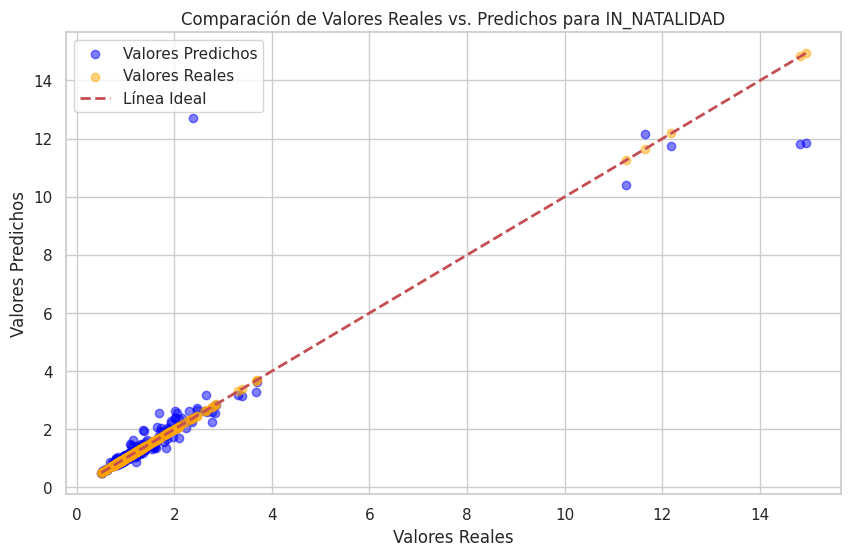

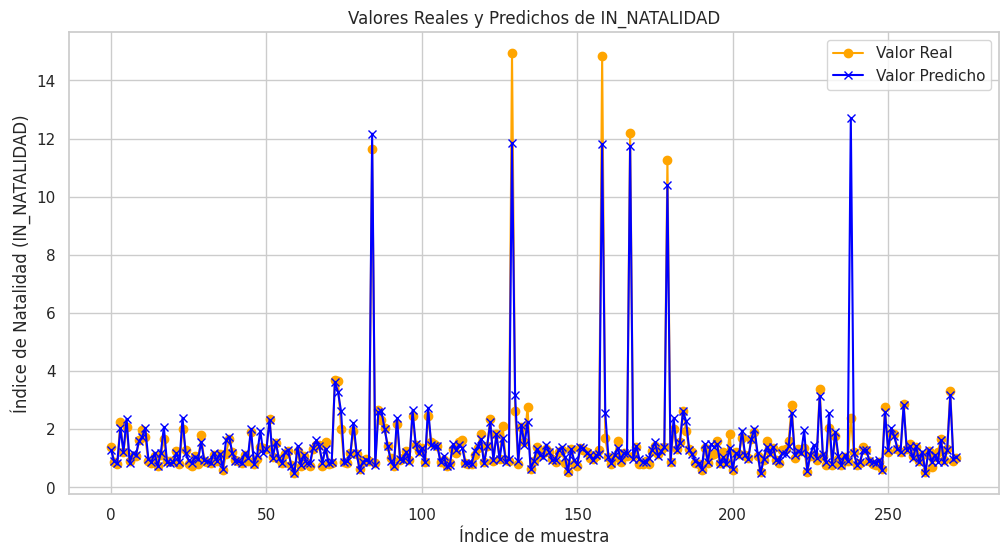

In [32]:
# Gráfico de dispersión de los valores reales vs. los predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c='blue', label='Valores Predichos', alpha=0.5)
plt.scatter(y_test, y_test, c='orange', label='Valores Reales', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Línea Ideal')
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparación de Valores Reales vs. Predichos para IN_NATALIDAD")
plt.legend()
plt.show()

# Gráfico de línea para comparar los valores reales y los predichos
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Valor Real", marker='o', color='orange')
plt.plot(y_pred, label="Valor Predicho", marker='x', color='blue')
plt.xlabel("Índice de muestra")
plt.ylabel("Índice de Natalidad (IN_NATALIDAD)")
plt.title("Valores Reales y Predichos de IN_NATALIDAD")
plt.legend()
plt.show()

### **Grafica de la Natalidad Predicha y Real**

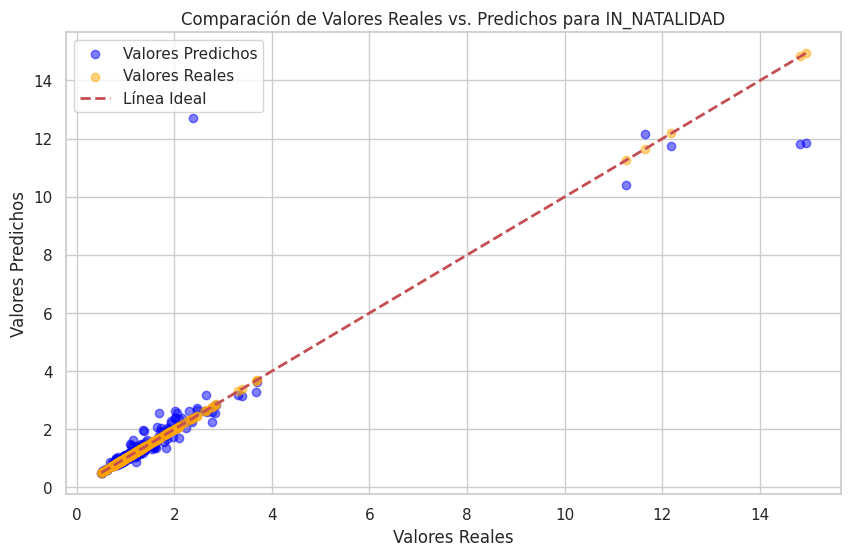

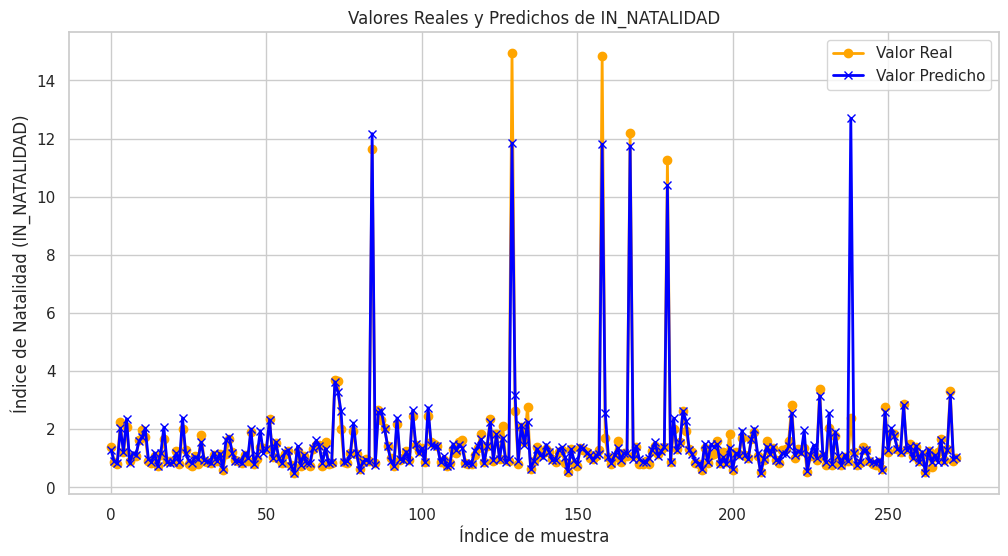

In [33]:
# Gráfico de dispersión de los valores reales vs. los predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c='blue', label='Valores Predichos', alpha=0.5)
plt.scatter(y_test, y_test, c='orange', label='Valores Reales', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Línea Ideal')
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparación de Valores Reales vs. Predichos para IN_NATALIDAD")
plt.legend()
plt.show()

# Gráfico de línea para comparar los valores reales y los predichos
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Valor Real", marker='o', color='orange', linewidth=2)
plt.plot(y_pred, label="Valor Predicho", marker='x', color='blue', linewidth=2)
plt.xlabel("Índice de muestra")
plt.ylabel("Índice de Natalidad (IN_NATALIDAD)")
plt.title("Valores Reales y Predichos de IN_NATALIDAD")
plt.legend()
plt.show()


##**Predicción de todos los datos**

In [34]:
features_scaled = scaler.fit_transform(features_m1)
predicciones = model.predict(features_scaled)
df_predict = df_final.copy()
df_predict['PREDICCION_IN_NATALIDAD'] = predicciones

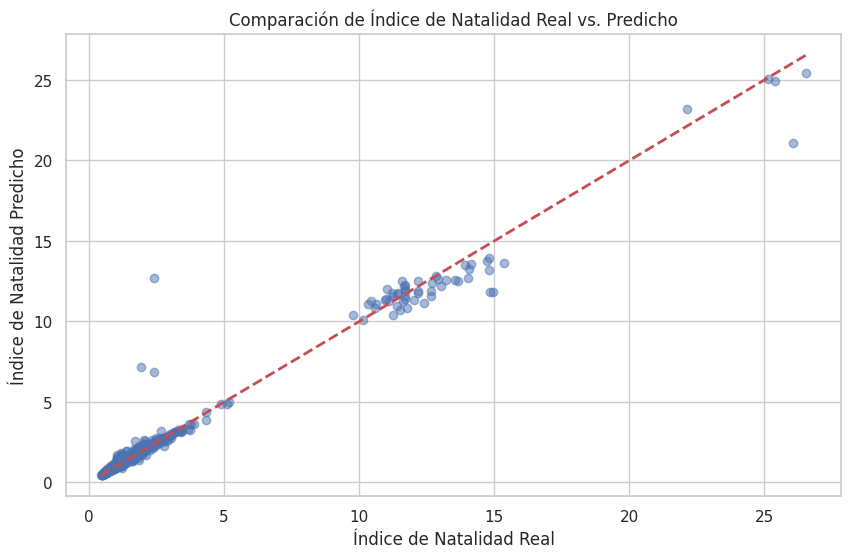

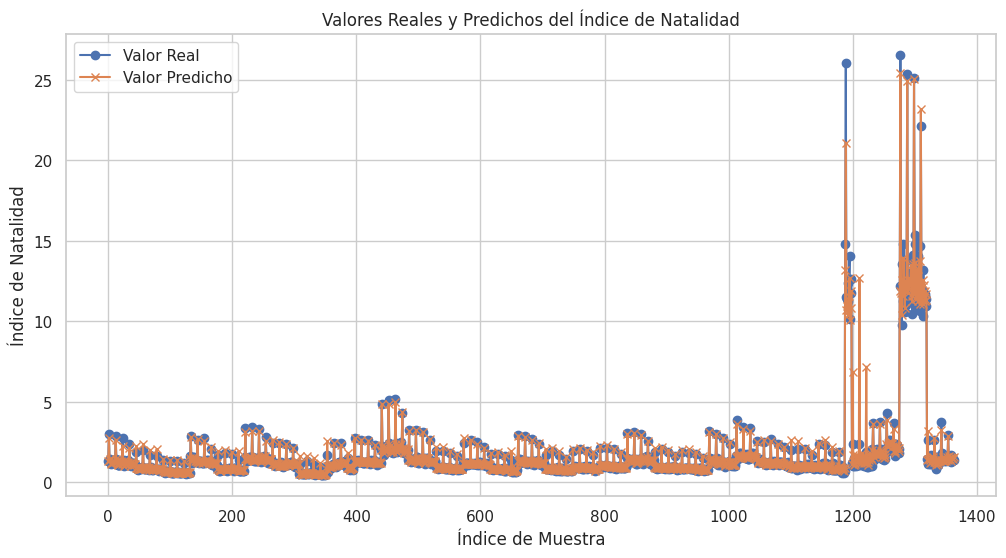

In [35]:
# Gráfico de dispersión: valores reales vs. valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(df_predict['IN_NATALIDAD'], df_predict['PREDICCION_IN_NATALIDAD'], alpha=0.5)
plt.plot([df_predict['IN_NATALIDAD'].min(), df_predict['IN_NATALIDAD'].max()],
         [df_predict['IN_NATALIDAD'].min(), df_predict['IN_NATALIDAD'].max()], 'r--', lw=2)
plt.xlabel("Índice de Natalidad Real")
plt.ylabel("Índice de Natalidad Predicho")
plt.title("Comparación de Índice de Natalidad Real vs. Predicho")
plt.show()

# Gráfico de línea: valores reales y predichos para visualizar tendencias
plt.figure(figsize=(12, 6))
plt.plot(df_predict['IN_NATALIDAD'].values, label="Valor Real", marker='o')
plt.plot(df_predict['PREDICCION_IN_NATALIDAD'].values, label="Valor Predicho", marker='x')
plt.xlabel("Índice de Muestra")
plt.ylabel("Índice de Natalidad")
plt.title("Valores Reales y Predichos del Índice de Natalidad")
plt.legend()
plt.show()


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Cálculo de métricas de error
mae = mean_absolute_error(df_predict['IN_NATALIDAD'], df_predict['PREDICCION_IN_NATALIDAD'])
mse = mean_squared_error(df_predict['IN_NATALIDAD'], df_predict['PREDICCION_IN_NATALIDAD'])
rmse = np.sqrt(mse)
r2 = r2_score(df_predict['IN_NATALIDAD'], df_predict['PREDICCION_IN_NATALIDAD'])

print("Error Absoluto Medio (MAE):", mae)
print("Error Cuadrático Medio (MSE):", mse)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse)
print("Coeficiente de Determinación (R2):", r2)



Error Absoluto Medio (MAE): 0.09809562553459271
Error Cuadrático Medio (MSE): 0.17610032002251125
Raíz del Error Cuadrático Medio (RMSE): 0.4196430864705282
Coeficiente de Determinación (R2): 0.9736854367752998


## <font color="GREY">**XG Bosst con hiperparamentros elegidos manualmente**</font>

Error cuadrático medio (MSE) en entrenamiento: 0.09847190860577734
Coeficiente de determinación (R2) en entrenamiento: 0.9871166738348359


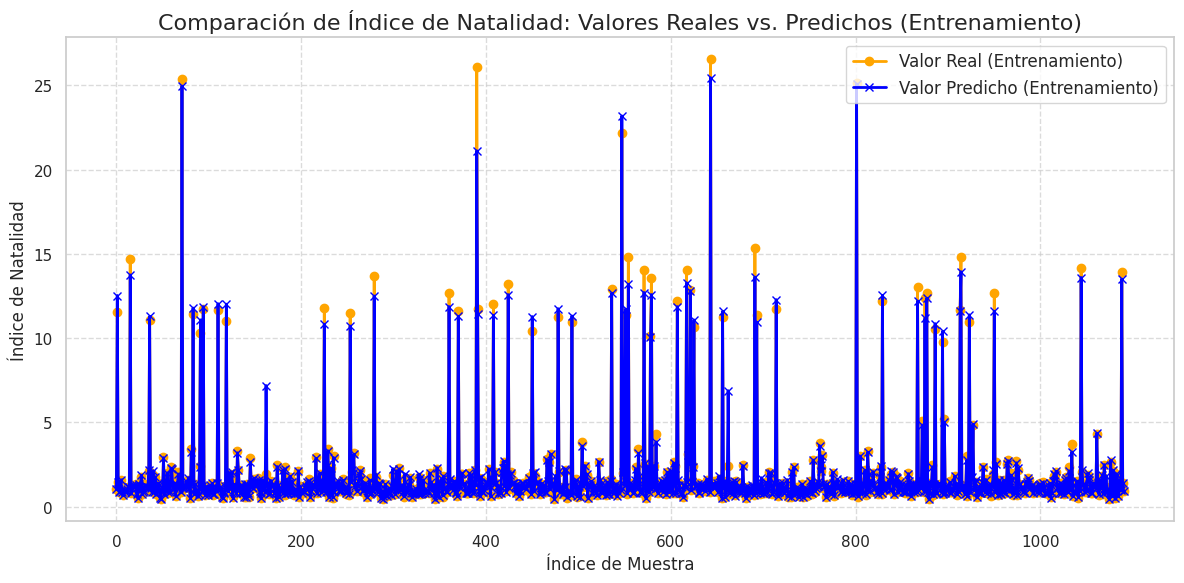

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)

# Cálculo de métricas de evaluación para el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Mostramos las métricas de evaluación del conjunto de entrenamiento
print("Error cuadrático medio (MSE) en entrenamiento:", mse_train)
print("Coeficiente de determinación (R2) en entrenamiento:", r2_train)

# Creamos el gráfico para comparar los valores reales y predichos en entrenamiento
plt.figure(figsize=(12, 6))

# Valores reales
plt.plot(np.arange(len(y_train)), y_train, label="Valor Real (Entrenamiento)", marker='o', color='orange', linewidth=2)

# Valores predichos
plt.plot(np.arange(len(y_train)), y_train_pred, label="Valor Predicho (Entrenamiento)", marker='x', color='blue', linewidth=2)
plt.title("Comparación de Índice de Natalidad: Valores Reales vs. Predichos (Entrenamiento)", fontsize=16)
plt.xlabel("Índice de Muestra", fontsize=12)
plt.ylabel("Índice de Natalidad", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


###**Grafica de la Natalidad Predicha y Real**

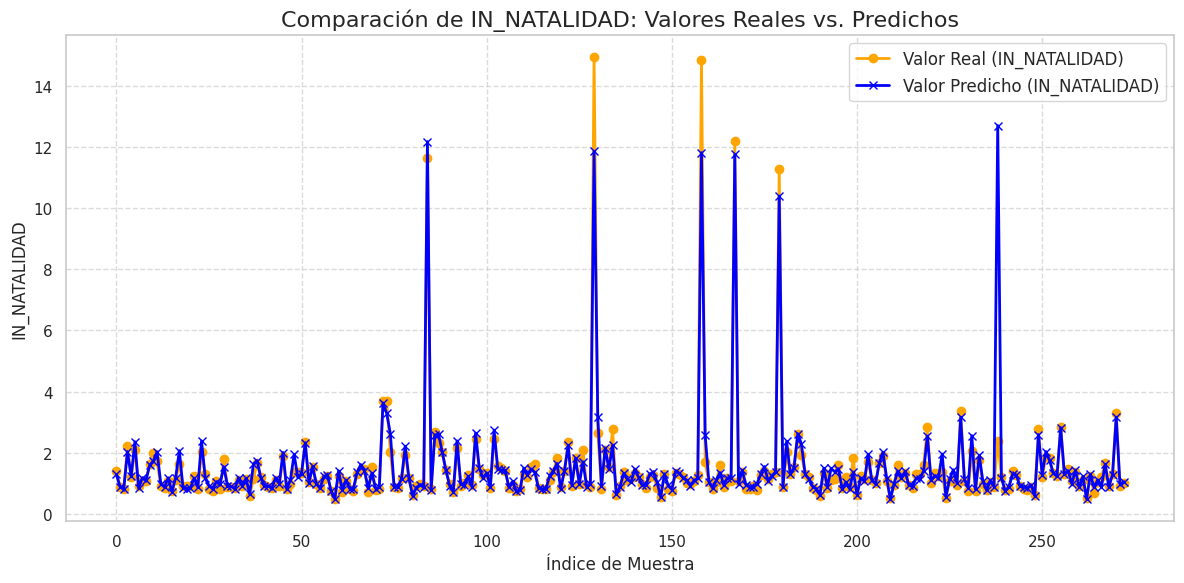

In [38]:
plt.figure(figsize=(12, 6))

# Valores reales
plt.plot(np.arange(len(y_test)), y_test, label="Valor Real (IN_NATALIDAD)", marker='o', color='orange', linewidth=2)

# Valores predichos
plt.plot(np.arange(len(y_pred)), y_pred, label="Valor Predicho (IN_NATALIDAD)", marker='x', color='blue', linewidth=2)

# Personalizar el gráfico
plt.title("Comparación de IN_NATALIDAD: Valores Reales vs. Predichos", fontsize=16)
plt.xlabel("Índice de Muestra", fontsize=12)
plt.ylabel("IN_NATALIDAD", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

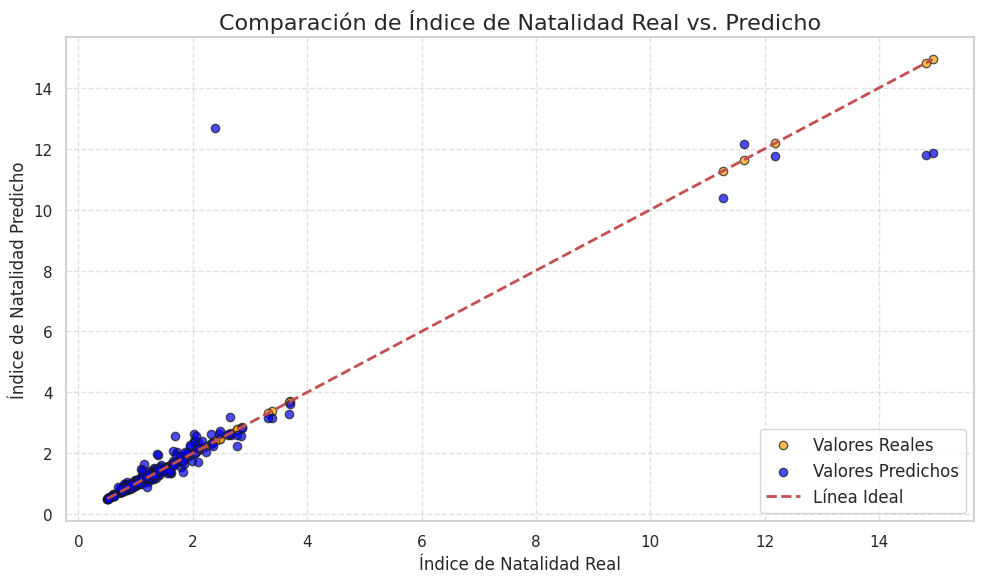

In [39]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))

# Valores reales (entrenamiento)
plt.scatter(y_test, y_test, c='orange', label='Valores Reales', alpha=0.7, edgecolors='k')

# Valores predichos
plt.scatter(y_test, y_pred, c='blue', label='Valores Predichos', alpha=0.7, edgecolors='k')

# Línea ideal (diagonal)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Línea Ideal')

# Personalizar el gráfico
plt.title("Comparación de Índice de Natalidad Real vs. Predicho", fontsize=16)
plt.xlabel("Índice de Natalidad Real", fontsize=12)
plt.ylabel("Índice de Natalidad Predicho", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



## <font color="GREY">**Árbol de decisión**</font>

In [48]:
from sklearn.tree import DecisionTreeRegressor

# Entrenaamos el modelo de Árbol de Decisión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

#Predicciones en el conjunto de prueba
tree_y_pred = tree_model.predict(X_test)

# Evaluación del modelo
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_r2 = r2_score(y_test, tree_y_pred)

print("Árbol de Decisión:")
print("Error cuadrático medio (MSE):", tree_mse)
print("Coeficiente de determinación (R2):", tree_r2)

# Importancia de las variables
feature_importances = tree_model.feature_importances_

# Crear un DataFrame para visualizar mejor las importancias
importance_df = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': feature_importances
}).sort_values(by='Importancia', ascending=False)

print("\nImportancia de las Variables:")
print(importance_df)


Árbol de Decisión:
Error cuadrático medio (MSE): 0.13754654554200732
Coeficiente de determinación (R2): 0.9509505499055918


ValueError: All arrays must be of the same length

In [50]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Entrenamos el modelo de Árbol de Decisión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
tree_y_pred = tree_model.predict(X_test)

# Evaluación del modelo
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_r2 = r2_score(y_test, tree_y_pred)

print("Árbol de Decisión:")
print("Error cuadrático medio (MSE):", tree_mse)
print("Coeficiente de determinación (R2):", tree_r2)

# Extraer nombres de columnas desde X_train si es un DataFrame
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns.tolist()
else:
    feature_names = ['Feature ' + str(i) for i in range(X_train.shape[1])]

# Verificar que las longitudes coincidan
assert len(feature_names) == len(tree_model.feature_importances_), \
    "La longitud de feature_names no coincide con el número de características en el modelo."

# Importancia de las variables
feature_importances = tree_model.feature_importances_

# Crear un DataFrame para visualizar mejor las importancias
importance_df = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': feature_importances
}).sort_values(by='Importancia', ascending=False)

print("\nImportancia de las Variables:")
print(importance_df)



Árbol de Decisión:
Error cuadrático medio (MSE): 0.13754654554200732
Coeficiente de determinación (R2): 0.9509505499055918

Importancia de las Variables:
      Variable  Importancia
28  Feature 28     0.673525
33  Feature 33     0.106095
31  Feature 31     0.090302
26  Feature 26     0.043705
30  Feature 30     0.038128
..         ...          ...
49  Feature 49     0.000000
55  Feature 55     0.000000
54  Feature 54     0.000000
53  Feature 53     0.000000
61  Feature 61     0.000000

[71 rows x 2 columns]


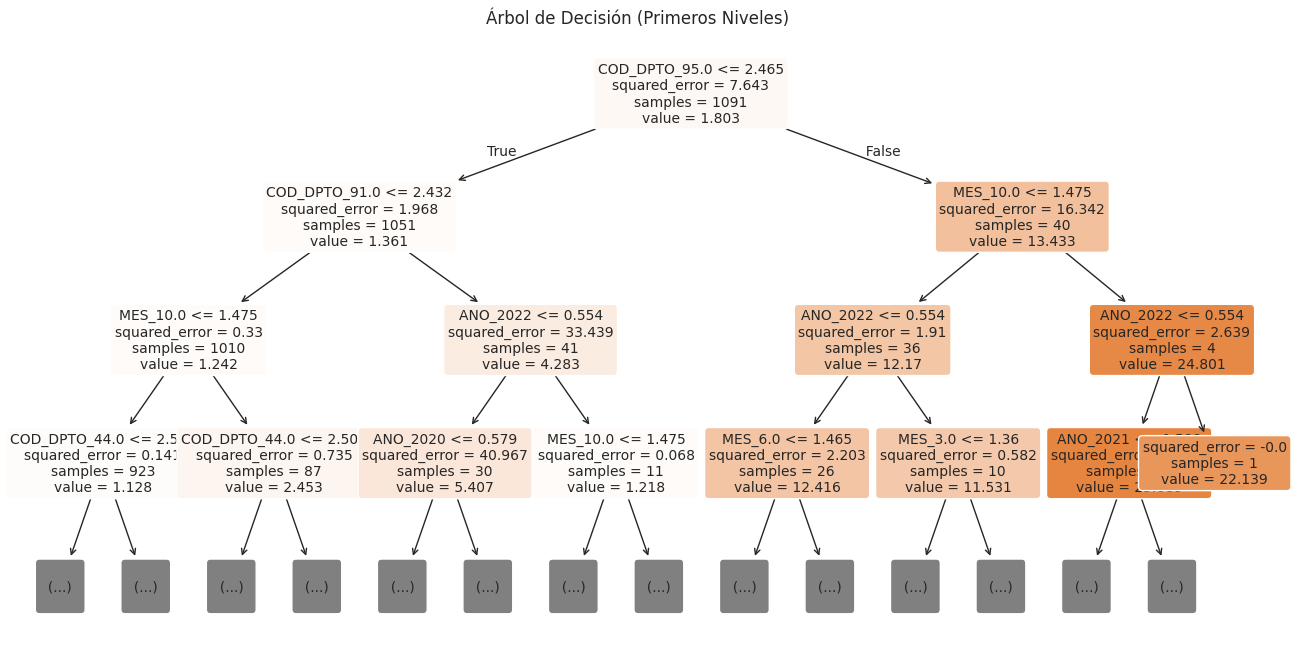

In [54]:
#Graficamos los 3 primeros niveles del arbol
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 8))
plot_tree(
    tree_model,
    feature_names=features_m1.columns,
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3
)
plt.title("Árbol de Decisión (Primeros Niveles)")
plt.show()


In [42]:
# Métricas del Random Forest
rf_mse = 0.260024456883014
rf_r2 = 0.8456928360102074

# Métricas del XGBoost (entrenamiento)
xgb_mse_train = 0.07783811232754759
xgb_r2_train = 0.9818941273430761

# Métricas del Árbol de Decisión
dt_mse = 0.0971047400696745
dt_r2 = 0.9423748164702108

# Crear un dataframe para la comparación
metrics_df = pd.DataFrame({
    "Modelo": ["Random Forest", "XGBoost (Entrenamiento)", "Árbol de Decisión"],
    "MSE": [rf_mse, xgb_mse_train, dt_mse],
    "R²": [rf_r2, xgb_r2_train, dt_r2]
})

# Ordenar los modelos por el mejor R²
metrics_df = metrics_df.sort_values(by="R²", ascending=False)

# Mostrar resultados
print(metrics_df)


                    Modelo       MSE        R²
1  XGBoost (Entrenamiento)  0.077838  0.981894
2        Árbol de Decisión  0.097105  0.942375
0            Random Forest  0.260024  0.845693


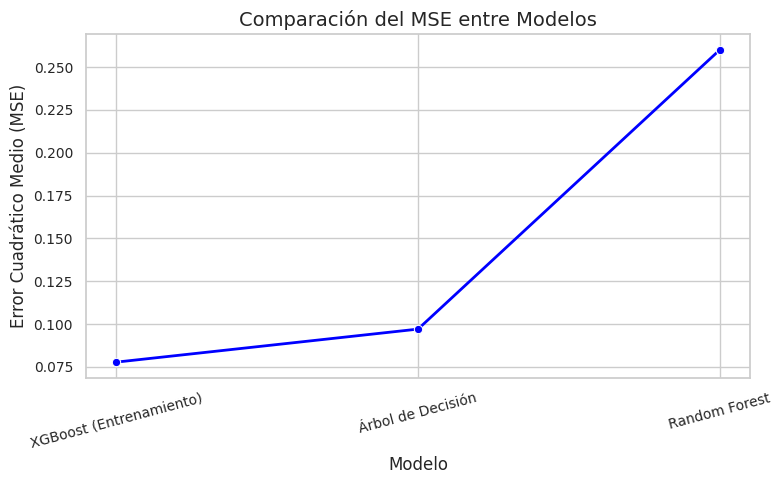

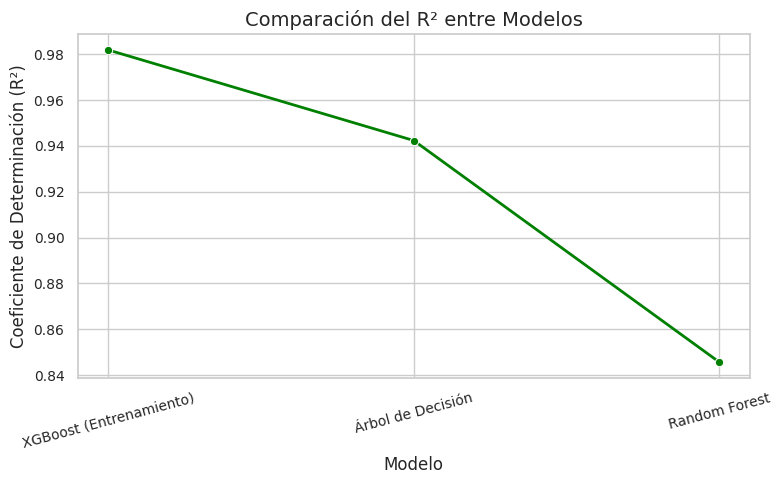

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general de estilo para seaborn
sns.set_theme(style="whitegrid")

# Colores específicos para cada gráfica
mse_color = "blue"
r2_color = "green"

# Gráfica de MSE
plt.figure(figsize=(8, 5))
sns.lineplot(data=metrics_df, x="Modelo", y="MSE", marker="o", linewidth=2, color=mse_color)
plt.title("Comparación del MSE entre Modelos", fontsize=14)
plt.xlabel("Modelo", fontsize=12)
plt.ylabel("Error Cuadrático Medio (MSE)", fontsize=12)
plt.xticks(rotation=15, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Gráfica de R²
plt.figure(figsize=(8, 5))
sns.lineplot(data=metrics_df, x="Modelo", y="R²", marker="o", linewidth=2, color=r2_color)
plt.title("Comparación del R² entre Modelos", fontsize=14)
plt.xlabel("Modelo", fontsize=12)
plt.ylabel("Coeficiente de Determinación (R²)", fontsize=12)
plt.xticks(rotation=15, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



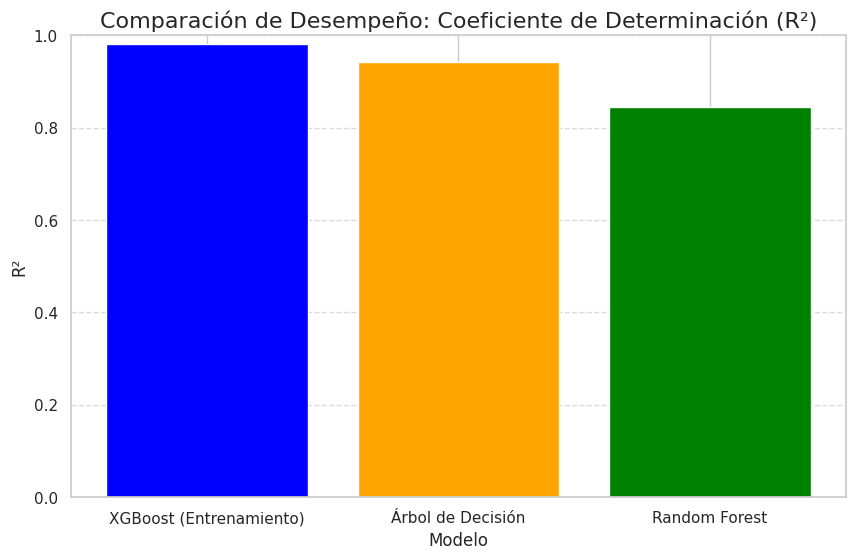

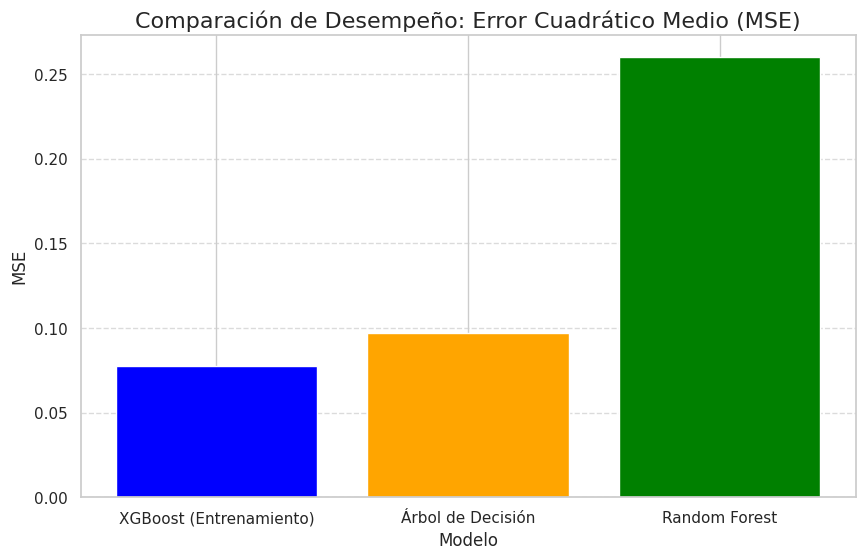

In [43]:
# Gráfica para comparación de R²
plt.figure(figsize=(10, 6))
plt.bar(metrics_df["Modelo"], metrics_df["R²"], color=["blue", "orange", "green"])
plt.title("Comparación de Desempeño: Coeficiente de Determinación (R²)", fontsize=16)
plt.xlabel("Modelo", fontsize=12)
plt.ylabel("R²", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gráfica para comparación de MSE
plt.figure(figsize=(10, 6))
plt.bar(metrics_df["Modelo"], metrics_df["MSE"], color=["blue", "orange", "green"])
plt.title("Comparación de Desempeño: Error Cuadrático Medio (MSE)", fontsize=16)
plt.xlabel("Modelo", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


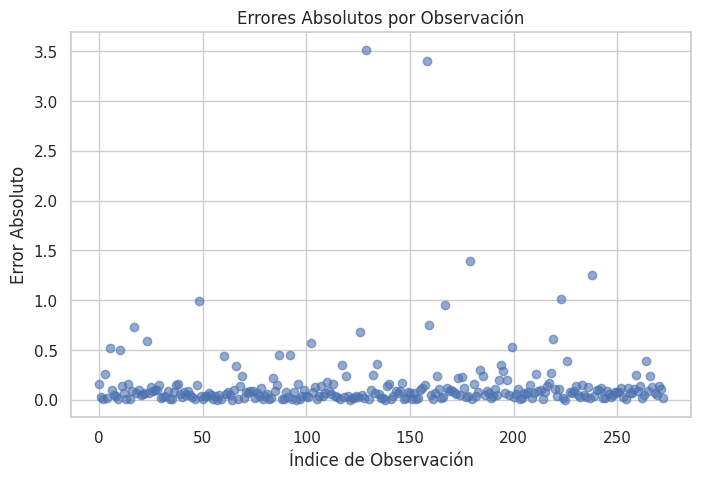

In [44]:
import numpy as np
import matplotlib.pyplot as plt

errors = np.abs(y_test - tree_y_pred)
plt.figure(figsize=(8, 5))
plt.scatter(range(len(errors)), errors, alpha=0.6)
plt.title("Errores Absolutos por Observación")
plt.xlabel("Índice de Observación")
plt.ylabel("Error Absoluto")
plt.grid(True)
plt.show()
